In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datos = pd.read_excel('/content/drive/My Drive/Colab_Notebooks/TFM/DatosHistoricos_v2.xlsx')
datos.head(5)

Fecha_Hora  Consumo_kWhs  Refrigeradora  Tomacorrientes_Cocina  \
0 2024-06-22 19:00:00        0.4264         0.0489                 0.0000   
1 2024-06-22 18:00:00        1.1911         0.1265                 0.0000   
2 2024-06-22 17:00:00        1.5698         0.1300                 0.0000   
3 2024-06-22 16:00:00        1.7114         0.1323                 0.0000   
4 2024-06-22 15:00:00        1.5255         0.1396                 0.0097   

   Cocina_Induccion  Tomacorriente_PB_Lavadora  Tomacorriente_PA  \
0            0.2669                     0.0373            0.0199   
1            0.0000                     0.0897            0.0304   
2            0.0000                     0.0887            0.0212   
3            0.0000                     0.0912            0.0211   
4            0.1175                     0.1073            0.0200   

   AireAcondicionado_Cuarto1  AireAcondicionado_Cuarto2  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AireAcondicionado_Oficina  ...  Sala_Temperatura_Gc  \
0                          0  ...                 27.8   
1                          0  ...                 25.3   
2                          0  ...                 26.2   
3                          0  ...                 26.2   
4                          0  ...                 28.4   

   Sala_Humedad_Relativa_Pct  PatioLateral_Temperatura_Gc  \
0                       62.0                         26.6   
1                       52.0                         28.8   
2                       54.0                         29.5   
3                       50.0                         30.2   
4                       60.0                         30.3   

   PatioLateral_Humedad_Relativa_Pct  ExteriorFachada_Temperatura_Gc  \
0                               76.0                            27.8   
1                               70.0                            29.9   
2                               69.0                            31.1   
3                               65.0                            31.8   
4                               64.0                            32.1   

   ExteriorFachada_Humedad_Relativa_Pct  CuartoPrincipal_Temperatura_Gc  \
0                                  71.0                            29.0   
1                                  66.0                            29.4   
2                                  63.0                            29.8   
3                                  61.0                            30.1   
4                                  61.0                            30.2   

   CuartoPrincipal_Humedad_Relativa_Pct  Cocina_Temperatura_Gc  \
0                                  67.0                   27.6   
1                                  63.0                   27.7   
2                                  65.0                   29.0   
3                                  65.0                   30.2   
4                                  64.0                   31.8   

   Cocina_Humedad_Relativa_Pct  
0                         59.0  
1                         46.0  
2                         45.0  
3                         47.0  
4                         64.0  

[5 rows x 25 columns]

In [4]:
print(f"Dimensiones del conjunto de datos {datos.shape}")

Dimensiones del conjunto de datos (8695, 25)


In [5]:
missing_values = datos.isnull().sum()
print("Valores perdidos: \n")
print(missing_values)

Valores perdidos: 

Fecha_Hora                                 0
Consumo_kWhs                               0
Refrigeradora                              0
Tomacorrientes_Cocina                      0
Cocina_Induccion                           0
Tomacorriente_PB_Lavadora                  0
Tomacorriente_PA                           0
AireAcondicionado_Cuarto1                  0
AireAcondicionado_Cuarto2                  0
AireAcondicionado_Oficina                  0
AireAcondicionado_Sala                     0
Iluminacion_PB                             0
Iluminacion_PA                             0
Bomba_Agua                                 0
Balance                                    0
Sala_Temperatura_Gc                     3729
Sala_Humedad_Relativa_Pct               3729
PatioLateral_Temperatura_Gc             3582
PatioLateral_Humedad_Relativa_Pct       3582
ExteriorFachada_Temperatura_Gc          3582
ExteriorFachada_Humedad_Relativa_Pct    3582
CuartoPrincipal_Temperatura_Gc     

In [7]:
datos['Fecha_Hora '] = pd.to_datetime(datos['Fecha_Hora'])
# Seleccionamos las columnas que formarán parte del modelo:

datosmodelo = datos[['Fecha_Hora', 'Consumo_kWhs', 'Refrigeradora', 'Tomacorrientes_Cocina', 'Cocina_Induccion', 'Tomacorriente_PB_Lavadora',
                     'Tomacorriente_PA', 'AireAcondicionado_Cuarto1', 'AireAcondicionado_Cuarto2', 'AireAcondicionado_Sala',
                     'Iluminacion_PB', 'Iluminacion_PA', 'Bomba_Agua', 'Balance']]

## Gráficas:

<ipython-input-8-3126041c8c51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosmodelo.sort_values(by='Fecha_Hora', inplace=True)


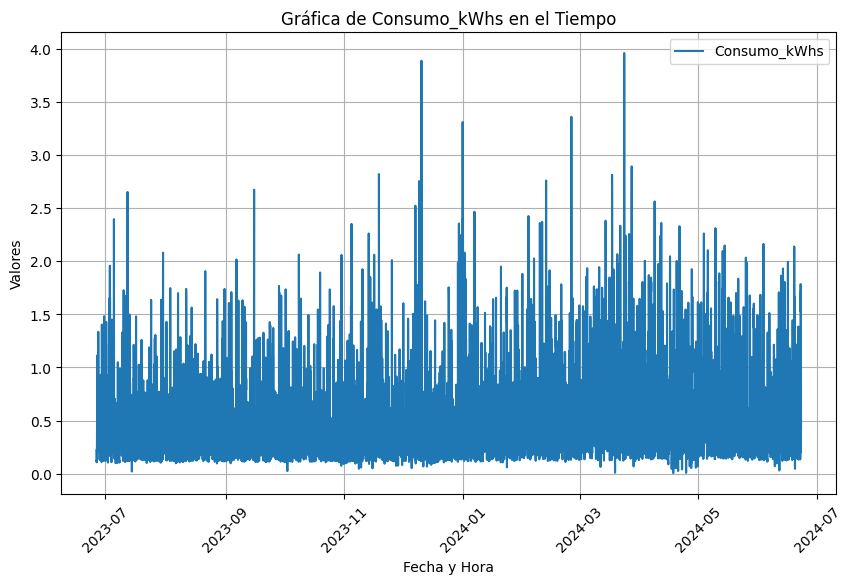

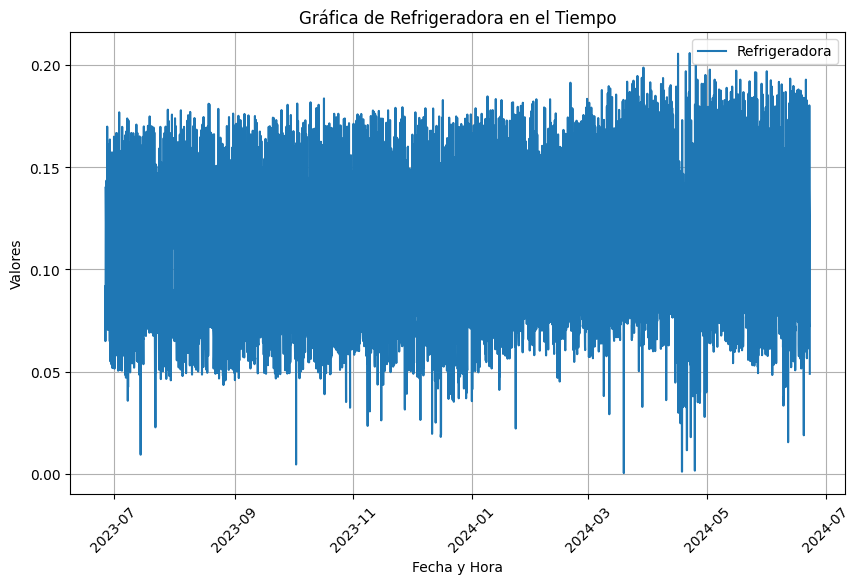

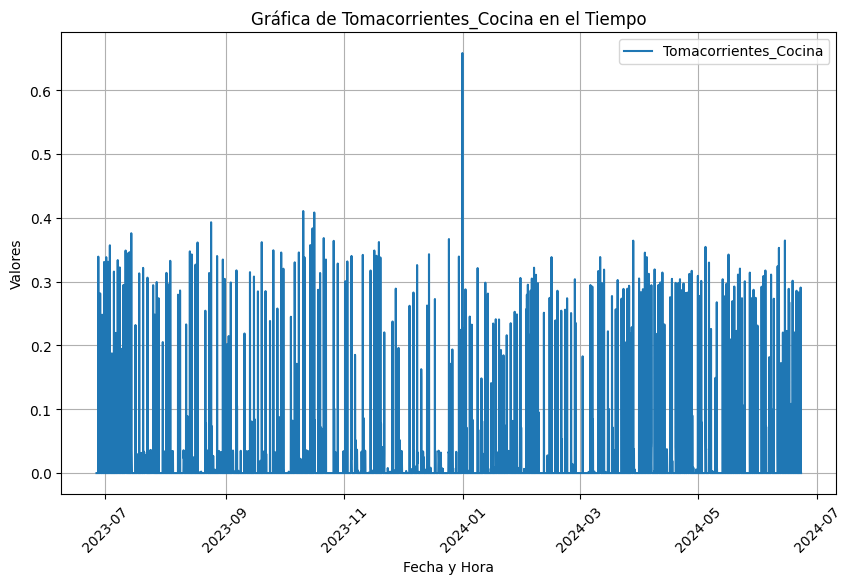

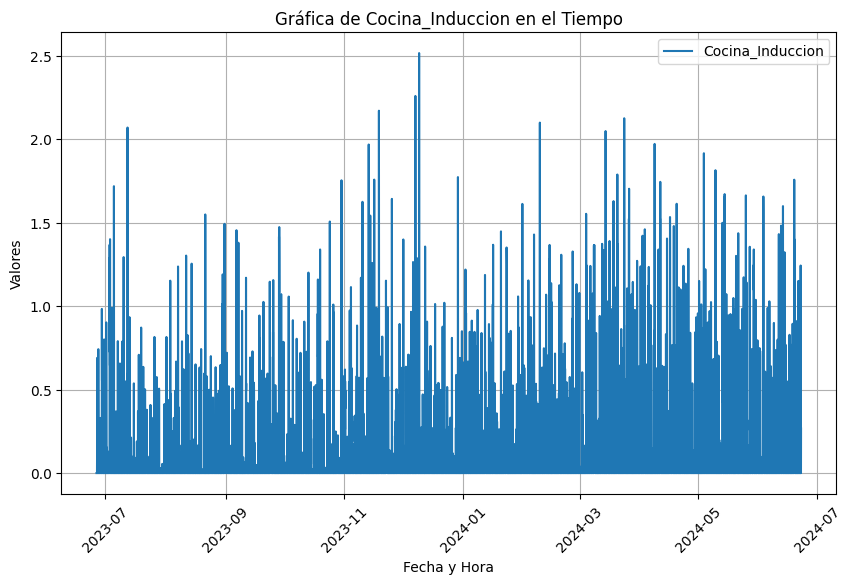

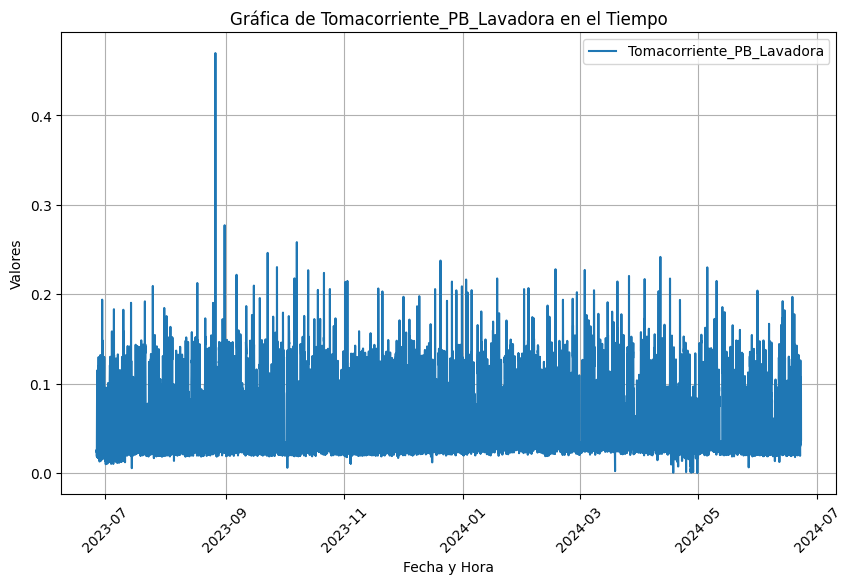

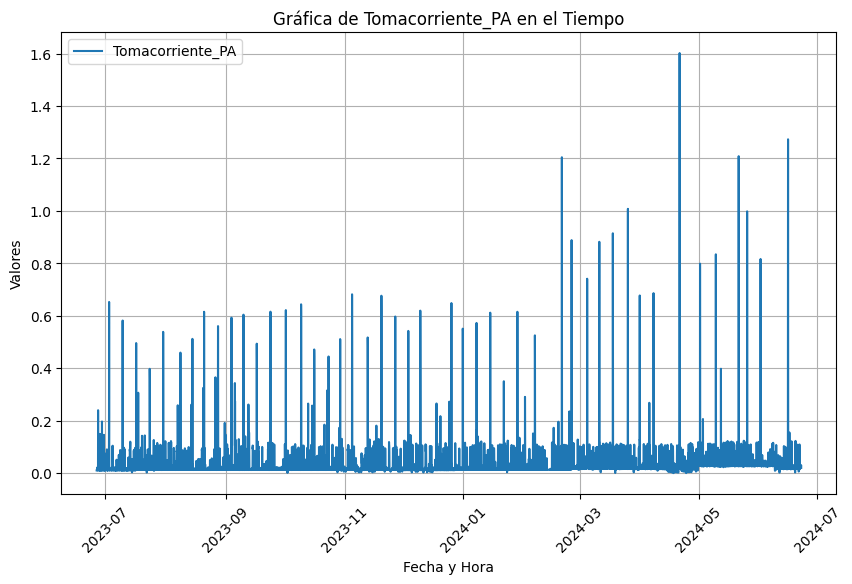

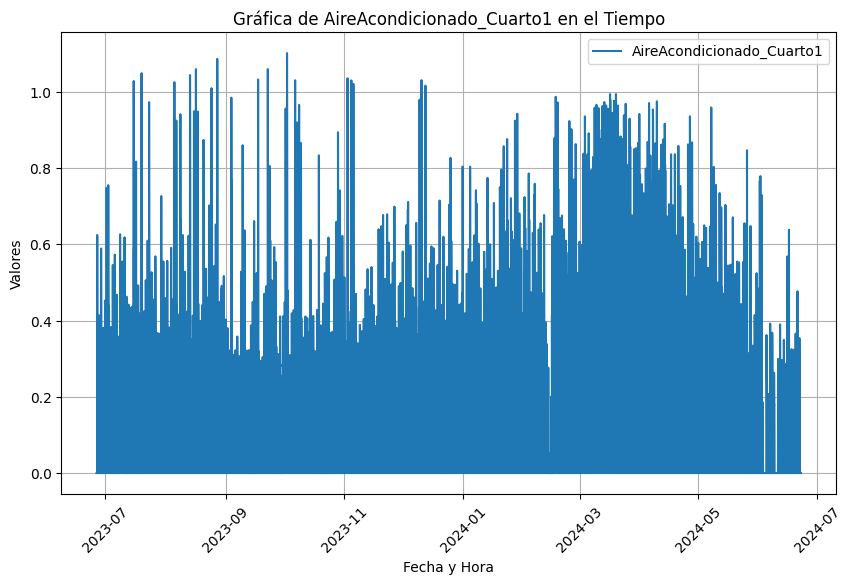

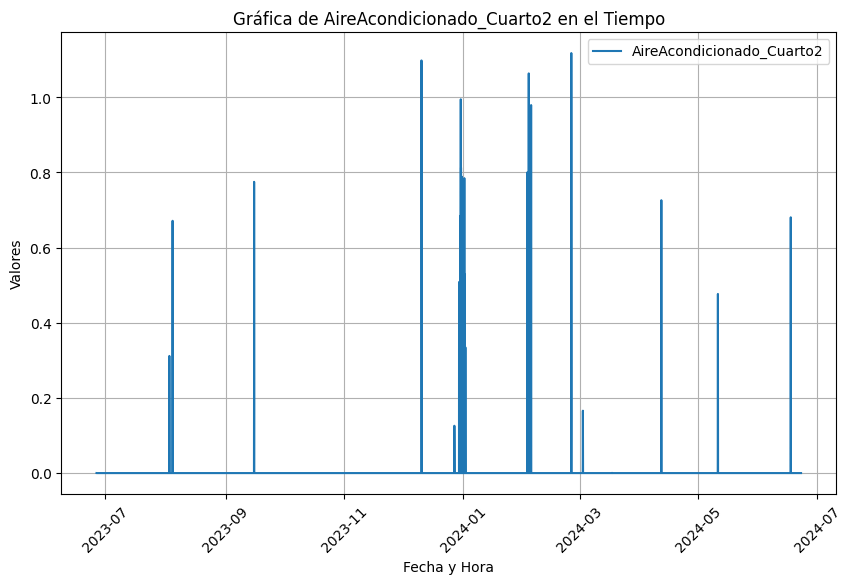

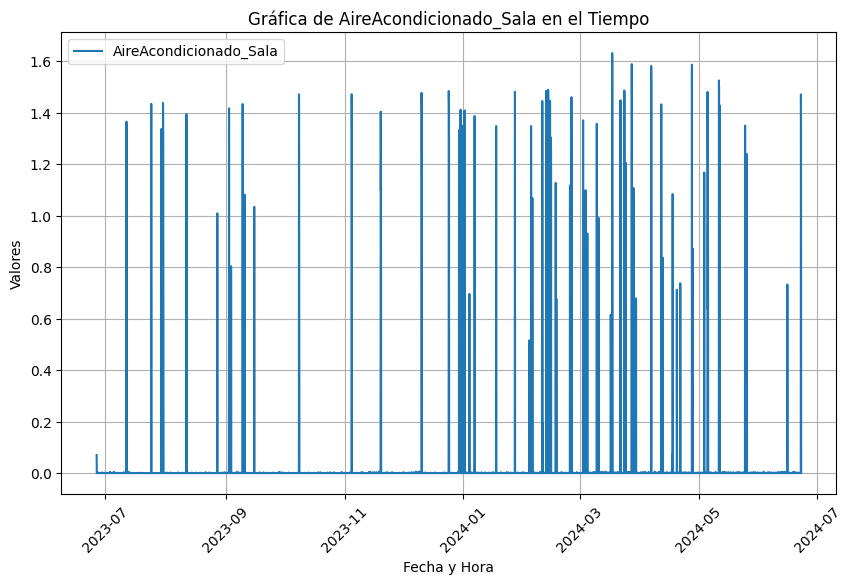

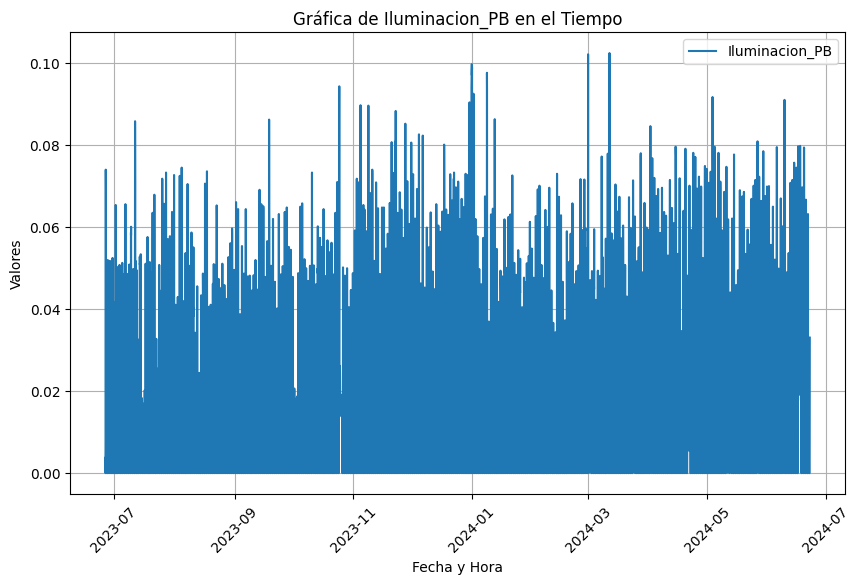

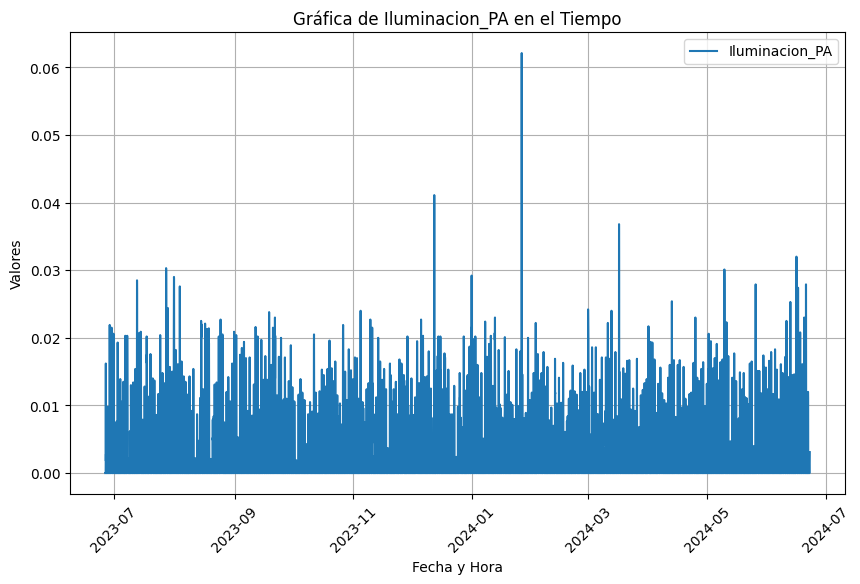

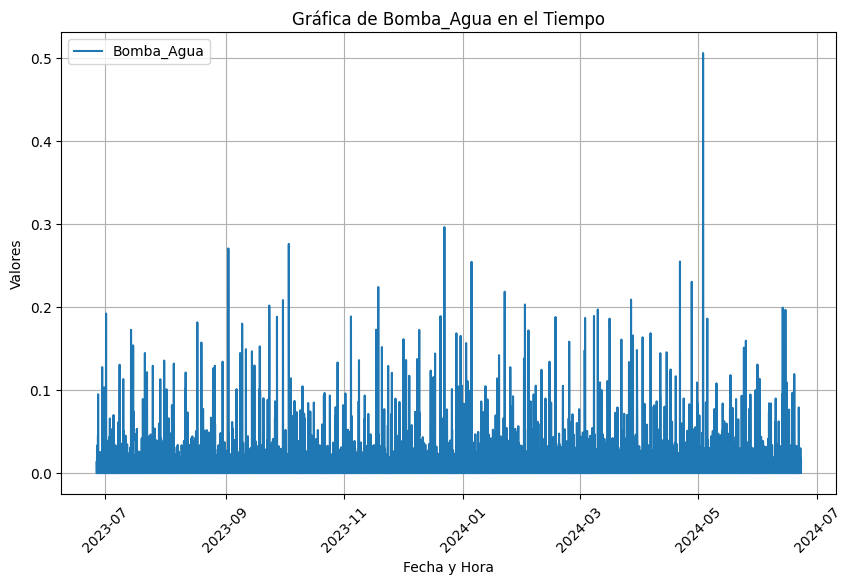

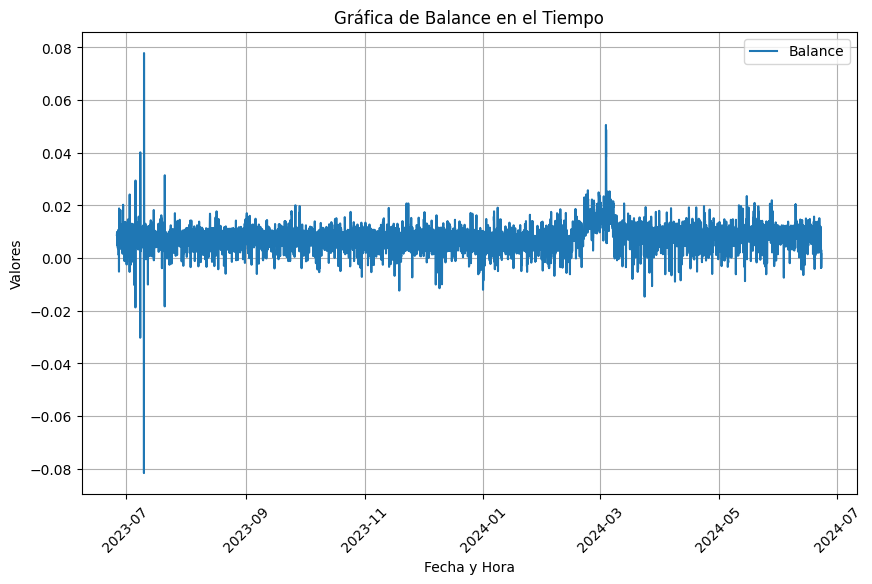

In [8]:
datosmodelo.sort_values(by='Fecha_Hora', inplace=True)
datosmodelo.set_index('Fecha_Hora', inplace=True)
datosmodelo = datosmodelo.asfreq('H')

# Graficar cada variable
for column in datosmodelo.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(datosmodelo.index, datosmodelo[column], label=column)

    plt.xlabel('Fecha y Hora')
    plt.ylabel('Valores')
    plt.title(f'Gráfica de {column} en el Tiempo')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

In [9]:
#!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00


División en entrenamiento y test:

In [11]:
# Librerías para series de tiempo:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def train_test_split(series, test_size=0.2):
    train_size = int(len(series) * (1 - test_size))
    train, test = series.iloc[:train_size], series.iloc[train_size:]
    return train, test

# 1. Visualización de la serie temporal
def plot_series(series, title):
    plt.figure(figsize=(10, 6))
    plt.plot(series)
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Valores')
    plt.title(title)
    plt.grid(True)
    plt.show()

# 2. Prueba de Dickey-Fuller Aumentada (ADF)
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Values: {key}, {value}')
    if result[1] < 0.05:
        print("La serie es estacionaria")
    else:
        print("La serie no es estacionaria")

# 3. Descomposición de la serie temporal
def decompose_series(series, period):
    decomposition = seasonal_decompose(series, model='additive', period=period)
    decomposition.plot()
    plt.show()

# 4. Diferenciación de la serie (si no es estacionaria)
def difference_series(series):
    return series.diff().dropna()

# 5. Selección del modelo ARIMA
def select_arima_model(series):
    model = auto_arima(series, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
    print(model.summary())
    return model

# 6. Evaluación del modelo
def evaluate_model(train, test, model):
    model_fit = model.fit(train)
    forecast = model_fit.predict(n_periods=len(test))

    plt.figure(figsize=(10, 6))
    plt.plot(train, label='Entrenamiento')
    plt.plot(test, label='Prueba')
    plt.plot(test.index, forecast, label='Predicción', color='red')
    plt.xlabel('Fecha y Hora')
    plt.ylabel('Valores')
    plt.title(f'Predicción ARIMA')
    plt.legend()
    plt.grid(True)
    plt.show()

    rmse = np.sqrt(mean_squared_error(test, forecast))
    print(f'RMSE: {rmse}')

    return model_fit

# 7. Validación del modelo
def validate_model_residuals(model_fit):
    residuals = pd.DataFrame(model_fit.resid())
    residuals.plot(kind='kde')
    plt.title('Distribución de los residuos')
    plt.show()
    print(residuals.describe())

    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    plot_acf(residuals, lags=20)
    plot_pacf(residuals, lags=20)
    plt.show()

# 8. Predicción
def predict_future(model_fit, periods):
    forecast = model_fit.predict(n_periods=periods)
    plt.figure(figsize=(10, 6))
    plt.plot(forecast, label='Predicción')
    plt.xlabel('Períodos')
    plt.ylabel('Valores')
    plt.title('Predicción Futura')
    plt.legend()
    plt.grid(True)
    plt.show()
    return forecast


--- Procesando Consumo_kWhs ---


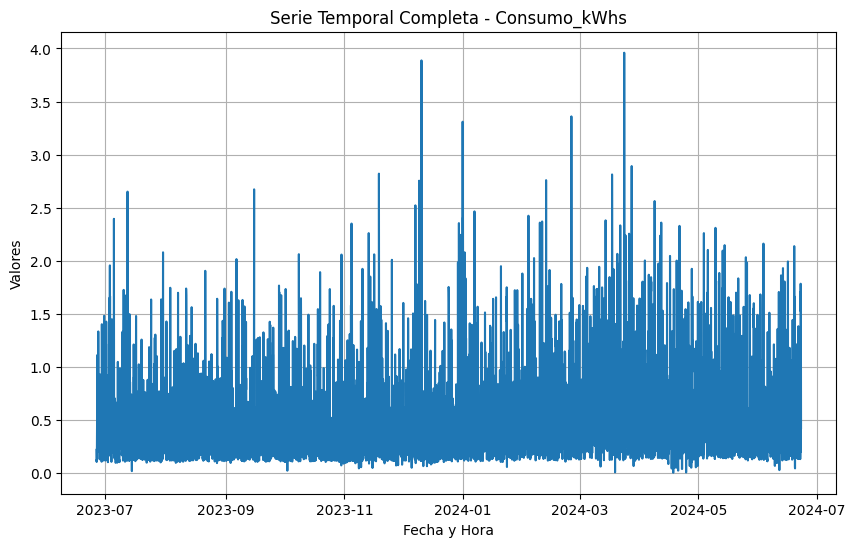

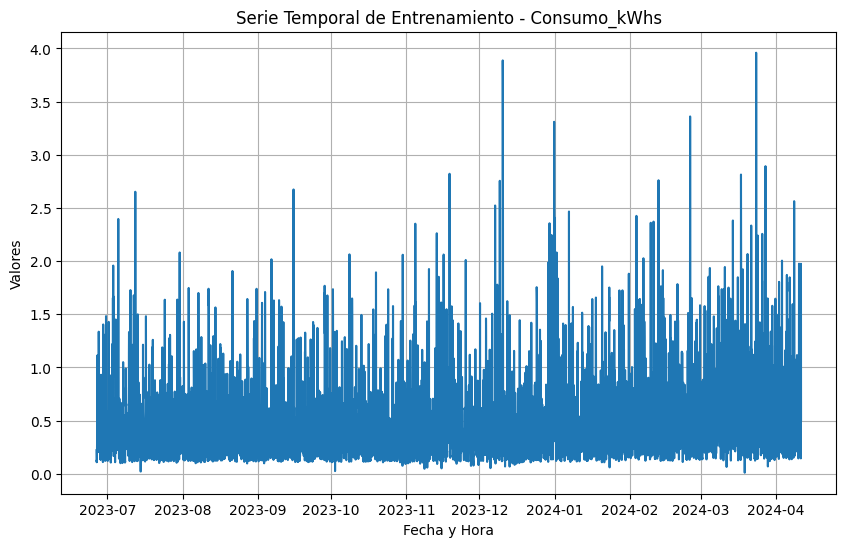

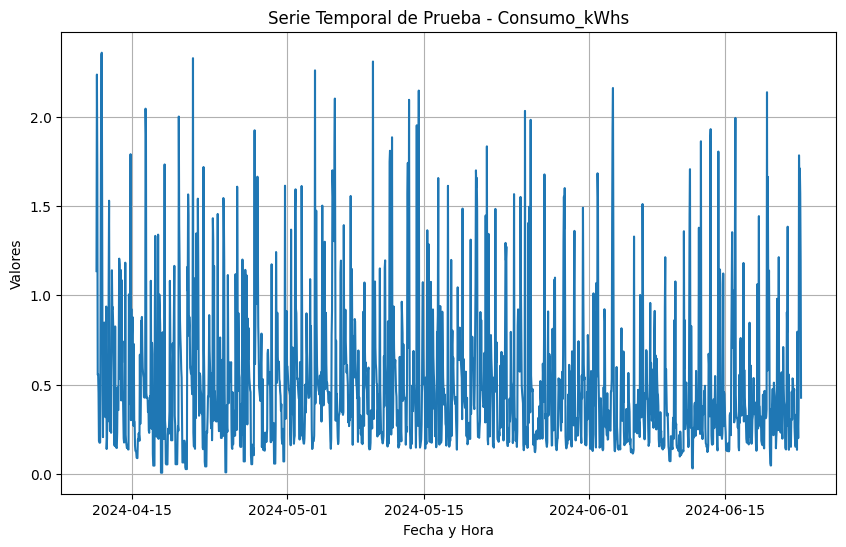


Prueba de Dickey-Fuller:
ADF Statistic: -8.226717942486554
p-value: 6.217902033189523e-13
Critical Values: 1%, -3.4312953363267806
Critical Values: 5%, -2.8619577619488235
Critical Values: 10%, -2.5669923707983897
La serie es estacionaria

Descomposición de la serie temporal:


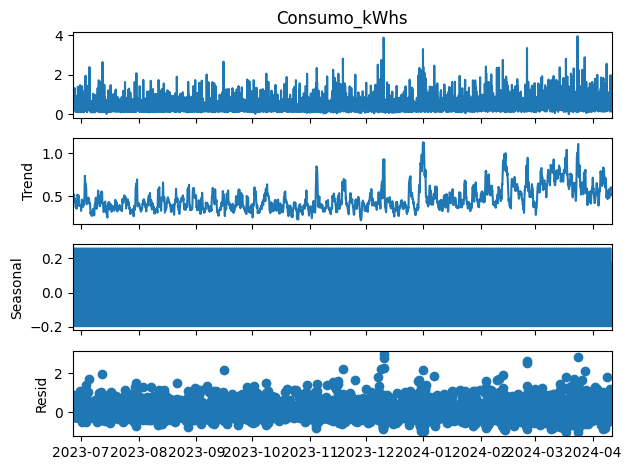


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=15.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6477.210, Time=1.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6042.369, Time=0.46 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5605.194, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6475.210, Time=0.34 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=10.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4551.264, Time=5.92 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.84 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=12.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4401.900, Time=16.10 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=20.25 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=21.29 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=15.12 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=22.99 sec
 ARIMA(1,1,3)(0,0,0)[0]             

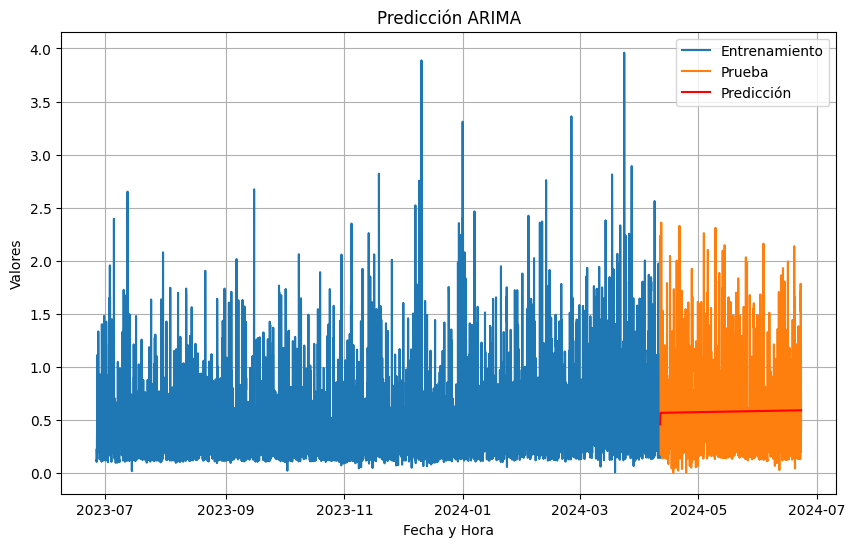

RMSE: 0.41304806221734025

Validación del modelo


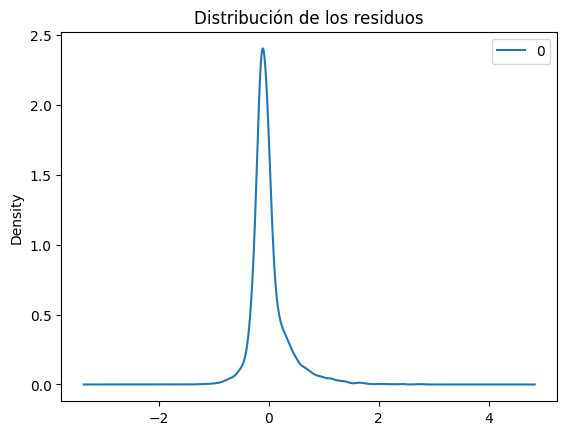

                 0
count  6956.000000
mean      0.000391
std       0.331740
min      -1.310828
25%      -0.163794
50%      -0.069180
75%       0.064973
max       2.790338


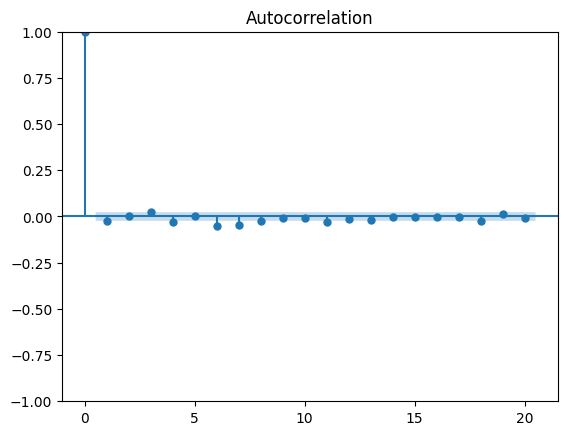

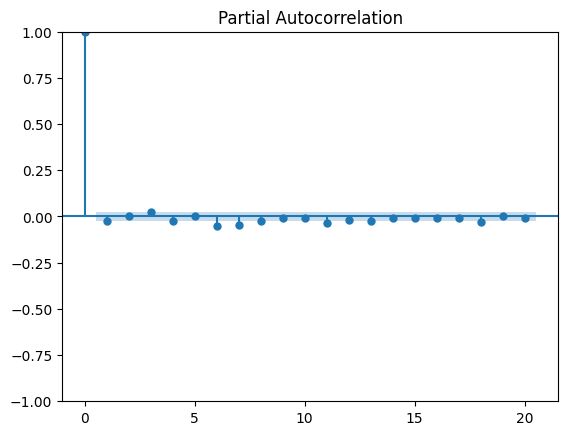


Predicción futura


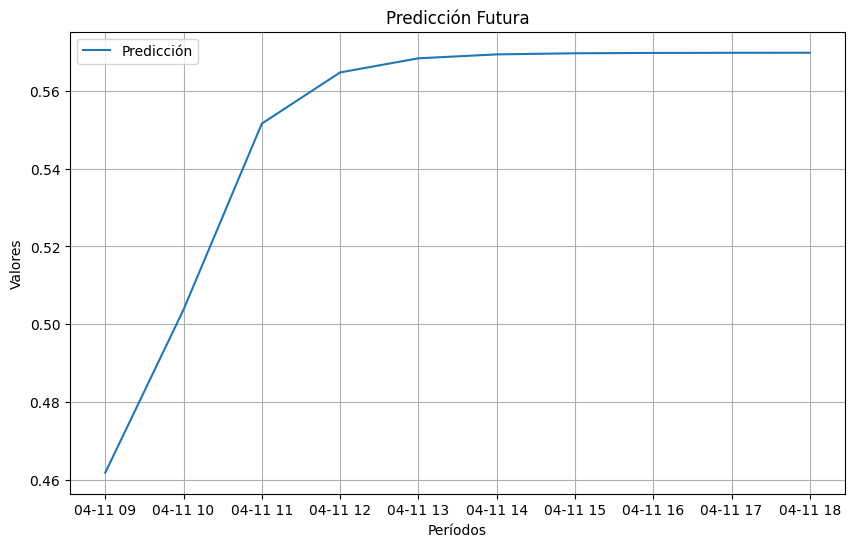


--- Procesando Refrigeradora ---


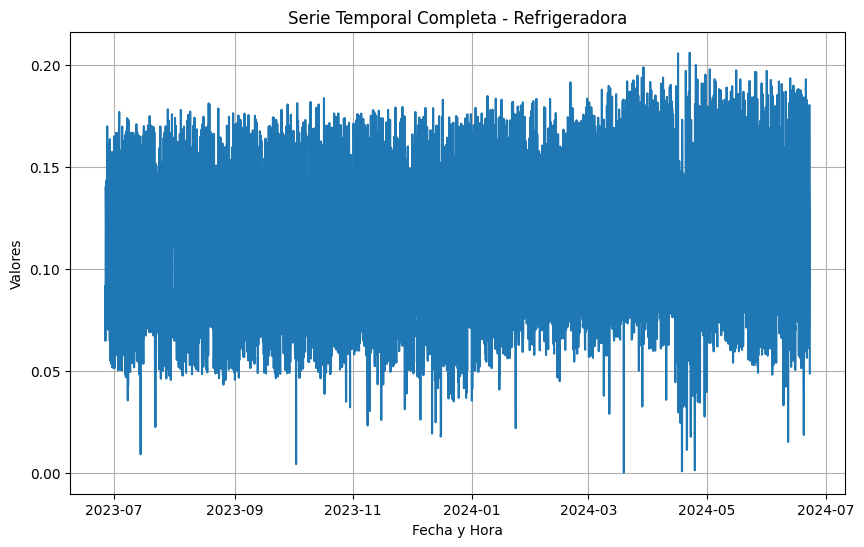

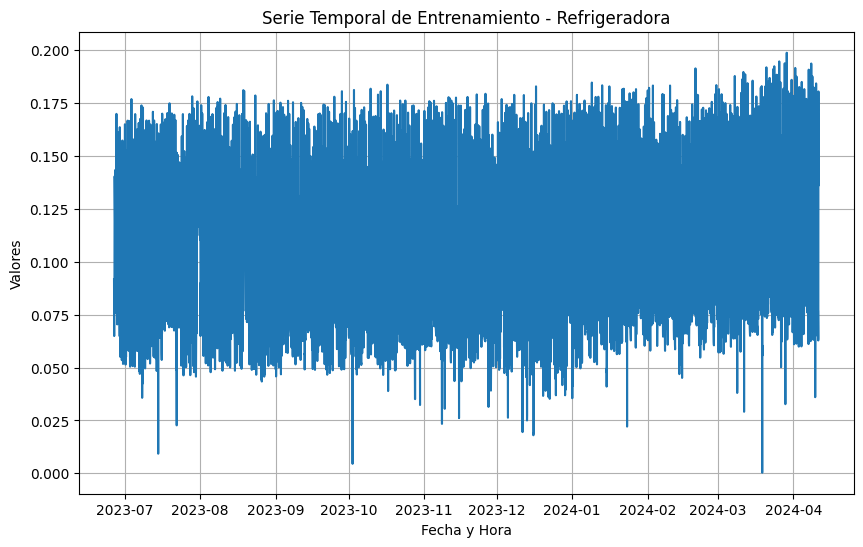

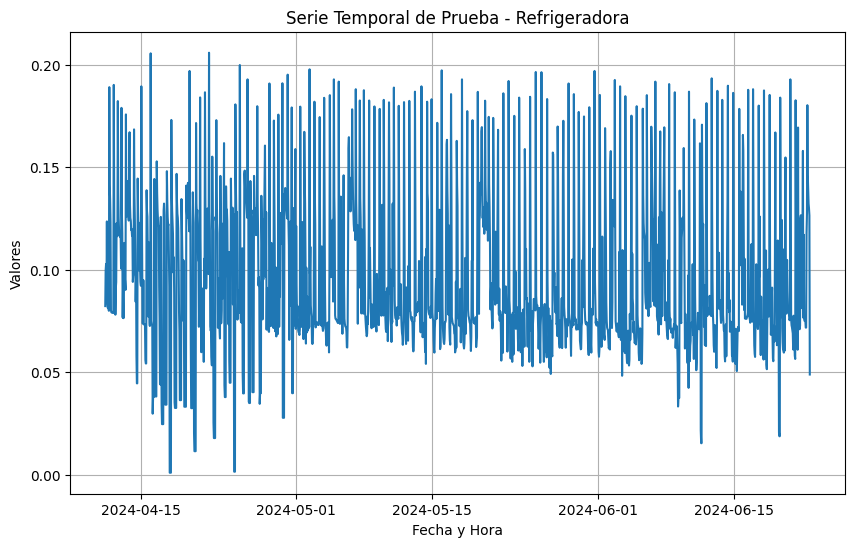


Prueba de Dickey-Fuller:
ADF Statistic: -12.09532624810788
p-value: 2.0770009202486614e-22
Critical Values: 1%, -3.4312953363267806
Critical Values: 5%, -2.8619577619488235
Critical Values: 10%, -2.5669923707983897
La serie es estacionaria

Descomposición de la serie temporal:


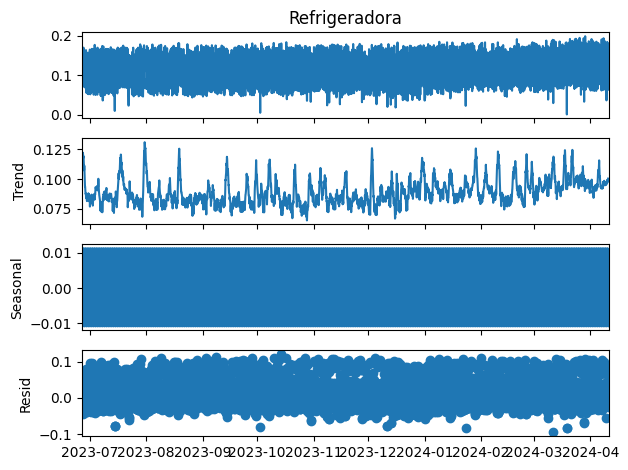


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=18.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-27027.159, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-27329.581, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-27766.989, Time=5.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-27029.159, Time=0.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-29162.319, Time=11.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=21.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=14.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=16.58 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-27788.804, Time=1.33 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=2.65 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 93.190 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observatio

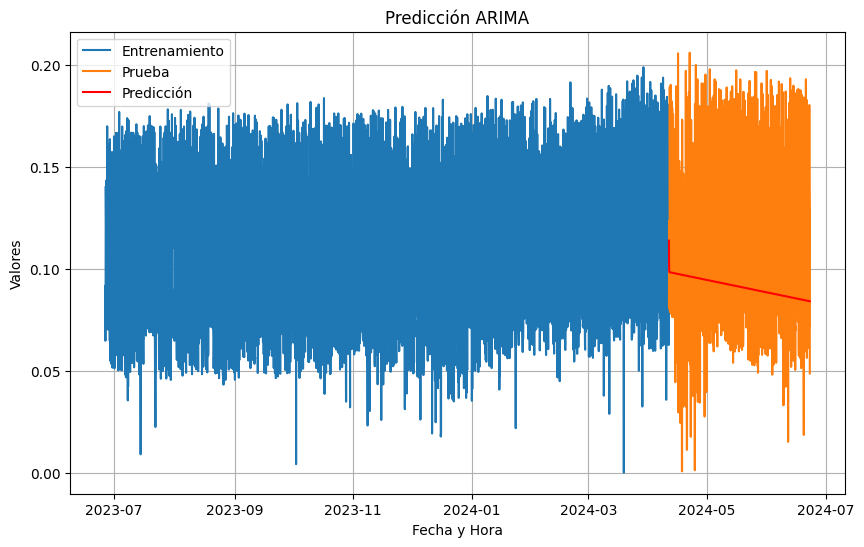

RMSE: 0.03716361226944156

Validación del modelo


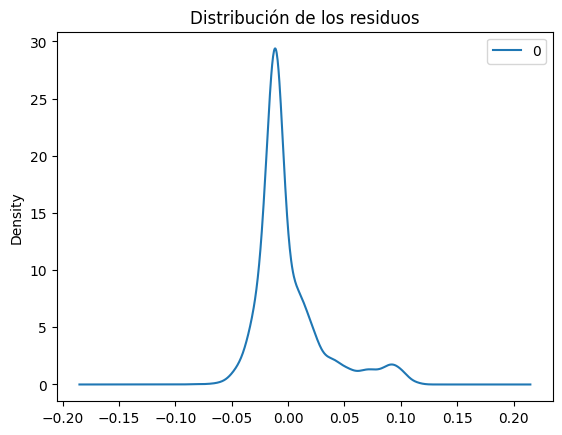

                 0
count  6956.000000
mean      0.000120
std       0.029736
min      -0.085049
25%      -0.015985
50%      -0.008945
75%       0.008403
max       0.114924


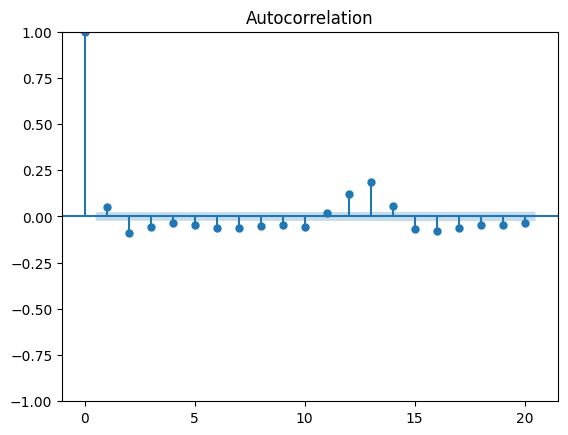

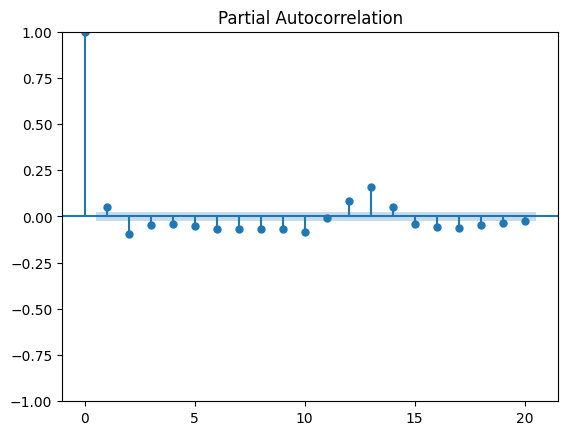


Predicción futura


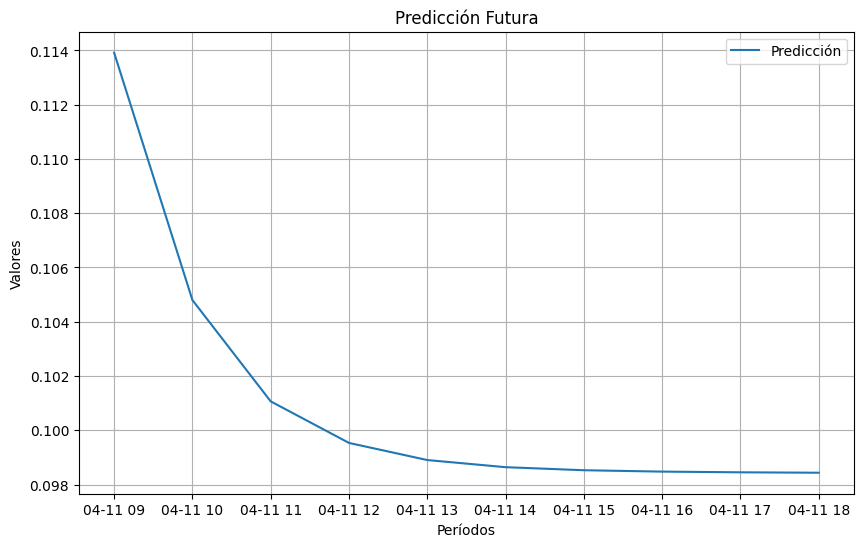


--- Procesando Tomacorrientes_Cocina ---


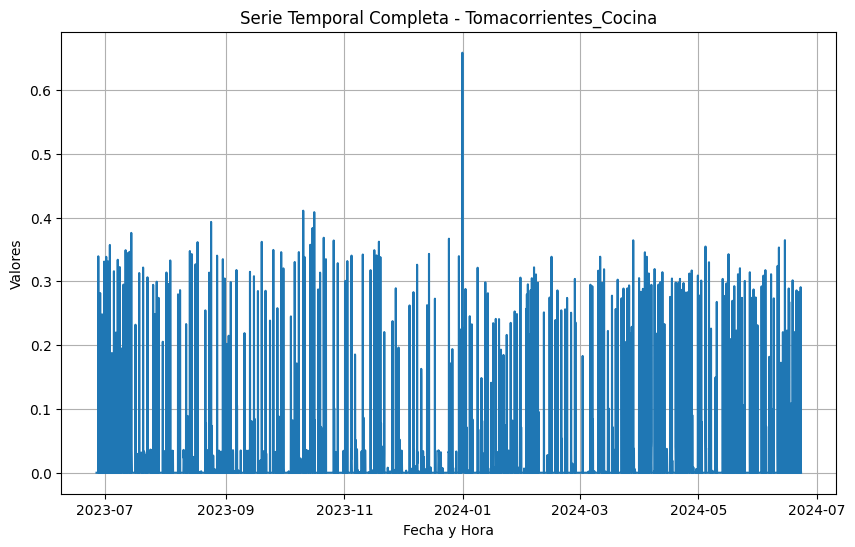

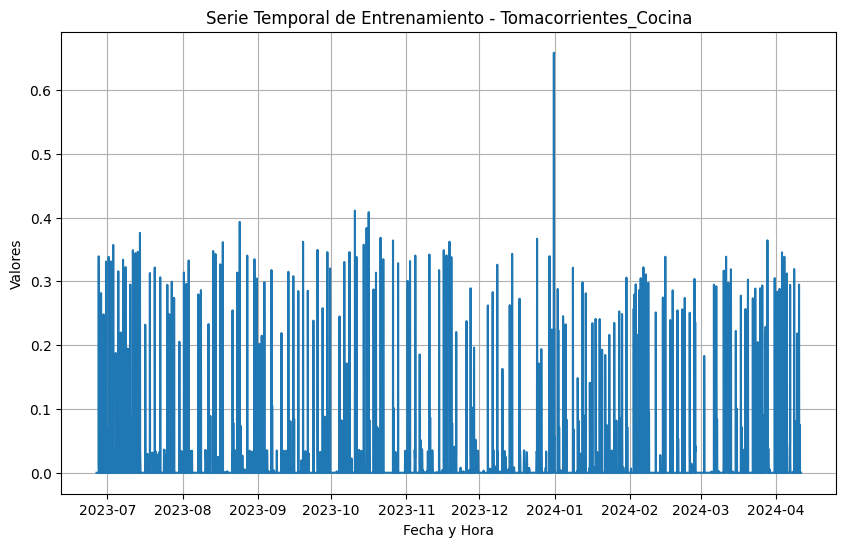

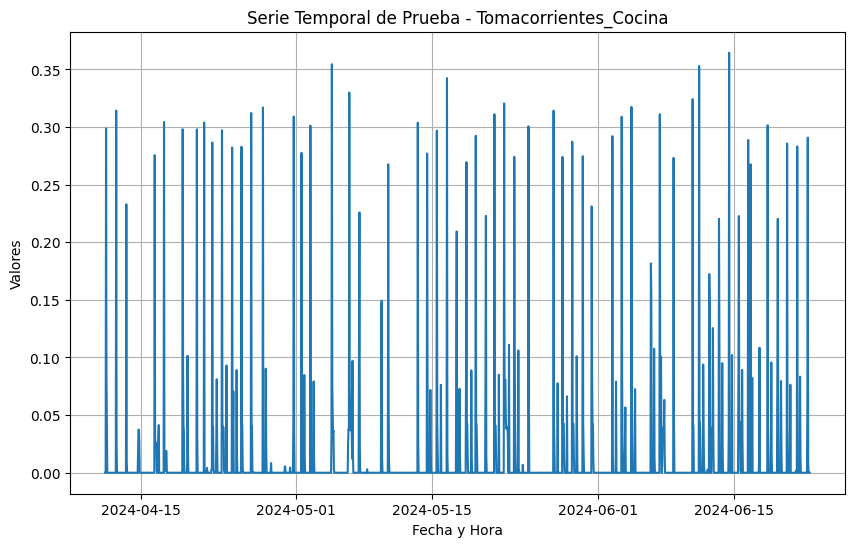


Prueba de Dickey-Fuller:
ADF Statistic: -14.154414902660214
p-value: 2.1340123435748486e-26
Critical Values: 1%, -3.4312953363267806
Critical Values: 5%, -2.8619577619488235
Critical Values: 10%, -2.5669923707983897
La serie es estacionaria

Descomposición de la serie temporal:


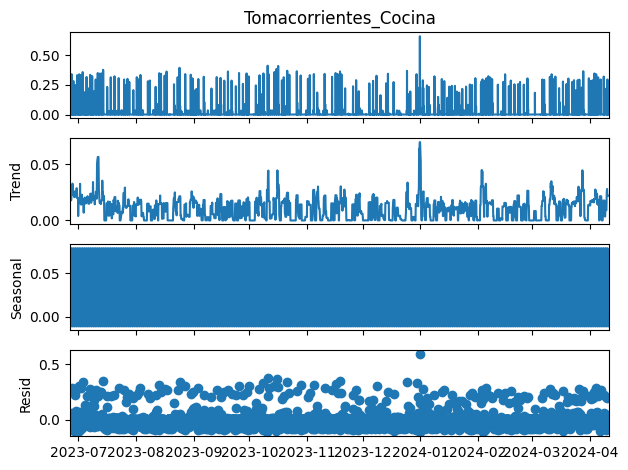


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=7.92 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-22214.172, Time=0.31 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-22478.071, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-22458.634, Time=0.76 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-22480.841, Time=1.12 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-22483.212, Time=1.38 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-22482.572, Time=1.68 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-22480.772, Time=1.98 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=5.68 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-22480.349, Time=4.70 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-22726.505, Time=3.46 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-22727.744, Time=2.57 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-22729.063, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-22570.573, Time=

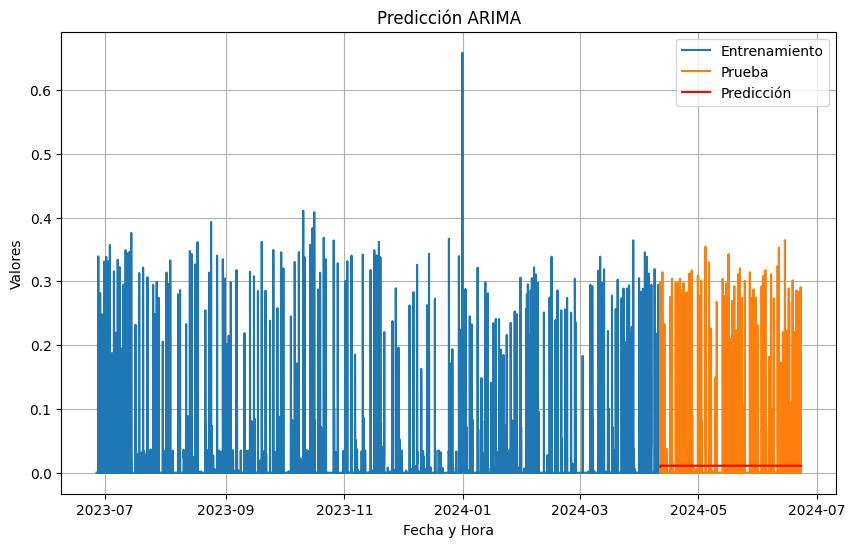

RMSE: 0.053983489363555875

Validación del modelo


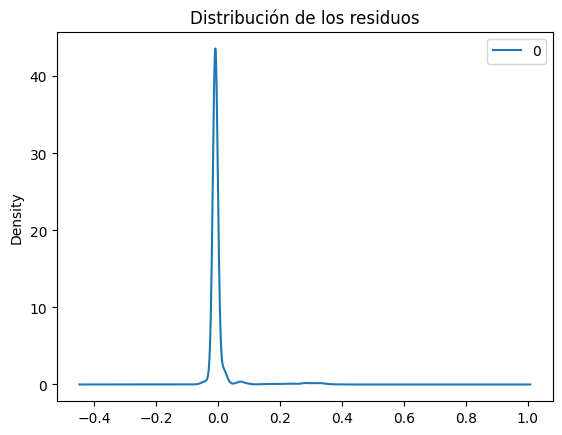

                  0
count  6.956000e+03
mean   2.588144e-07
std    4.721359e-02
min   -8.414819e-02
25%   -9.322594e-03
50%   -9.322594e-03
75%   -9.322594e-03
max    6.439329e-01


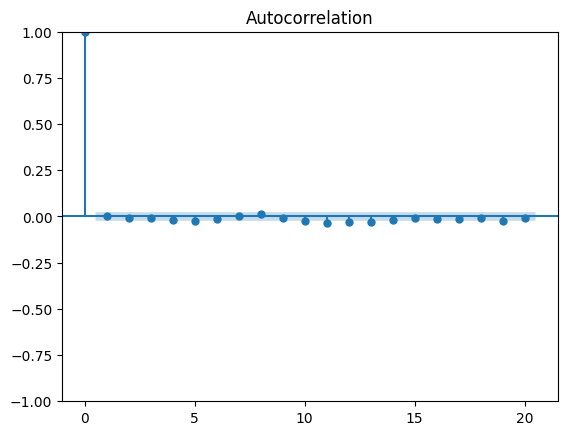

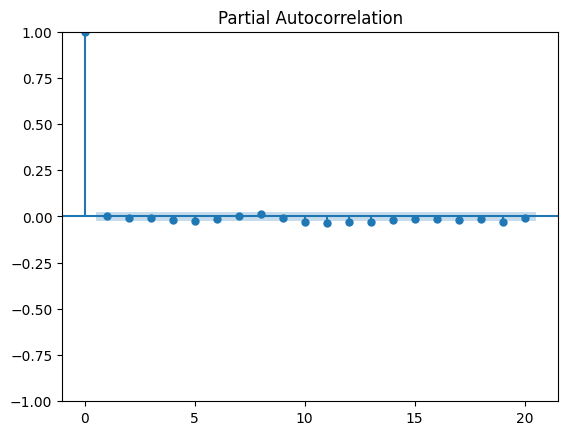


Predicción futura


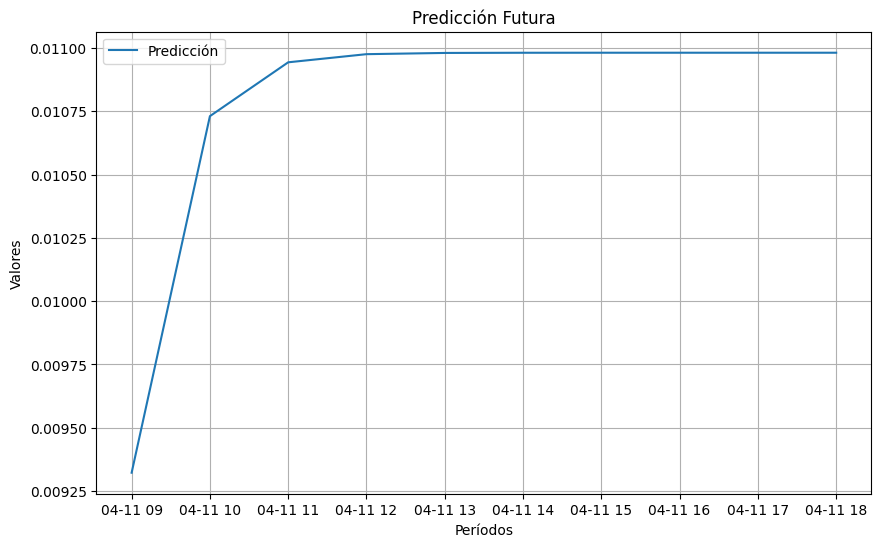


--- Procesando Cocina_Induccion ---


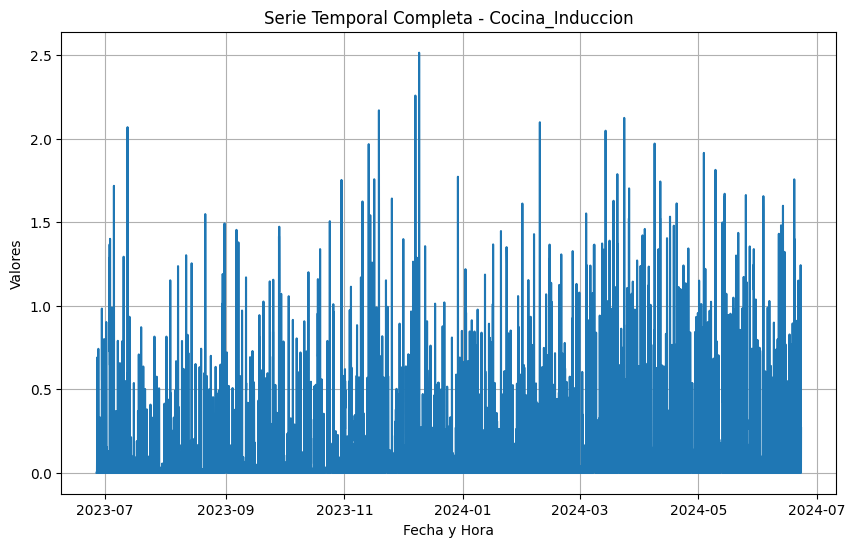

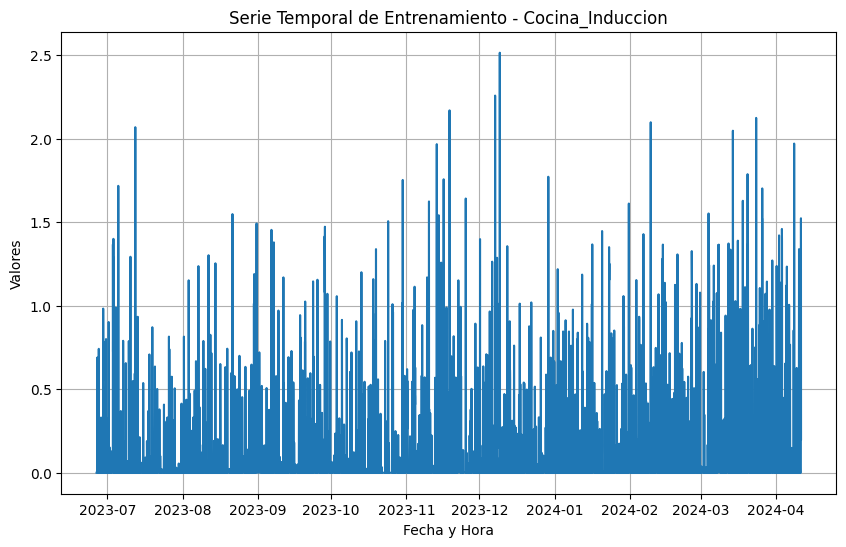

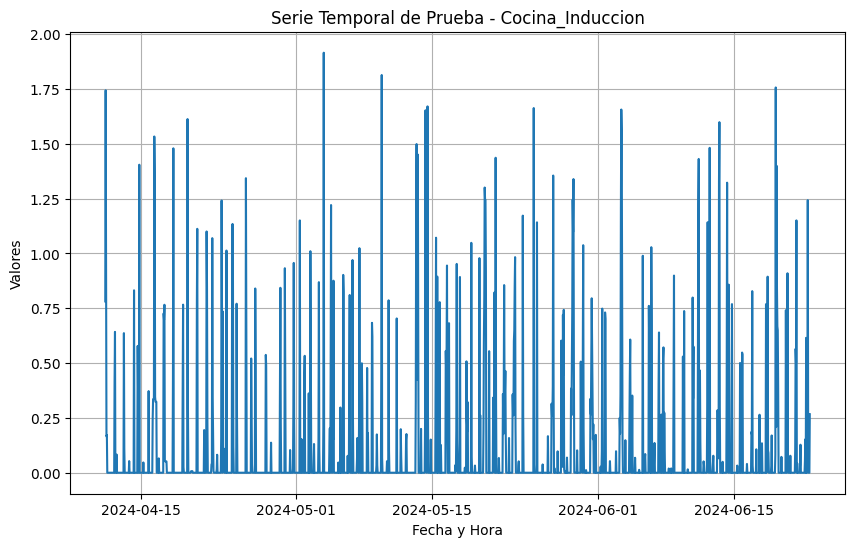


Prueba de Dickey-Fuller:
ADF Statistic: -13.543264068471643
p-value: 2.4894790083630393e-25
Critical Values: 1%, -3.431294926524444
Critical Values: 5%, -2.861957580878231
Critical Values: 10%, -2.566992274411231
La serie es estacionaria

Descomposición de la serie temporal:


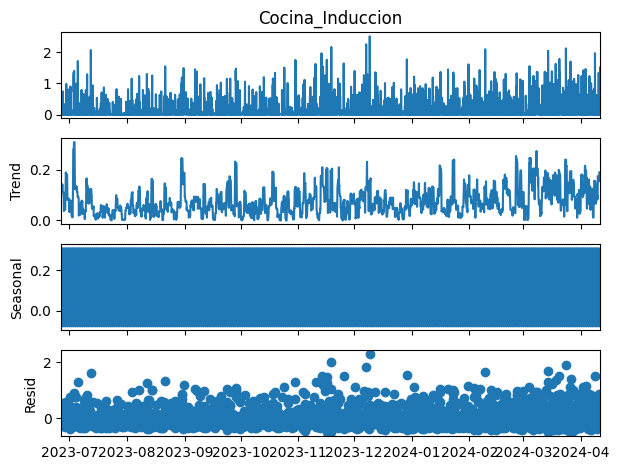


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1705.920, Time=0.69 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=803.123, Time=2.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1703.920, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=270.879, Time=2.23 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-30.622, Time=1.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-285.834, Time=1.54 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-315.498, Time=2.48 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=22.85 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=16.96 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=-317.495, Time=0.95 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=-287.831, Time=0.82 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=9.22 sec
 ARIMA(4,1,1)(0,0,0)[0]       

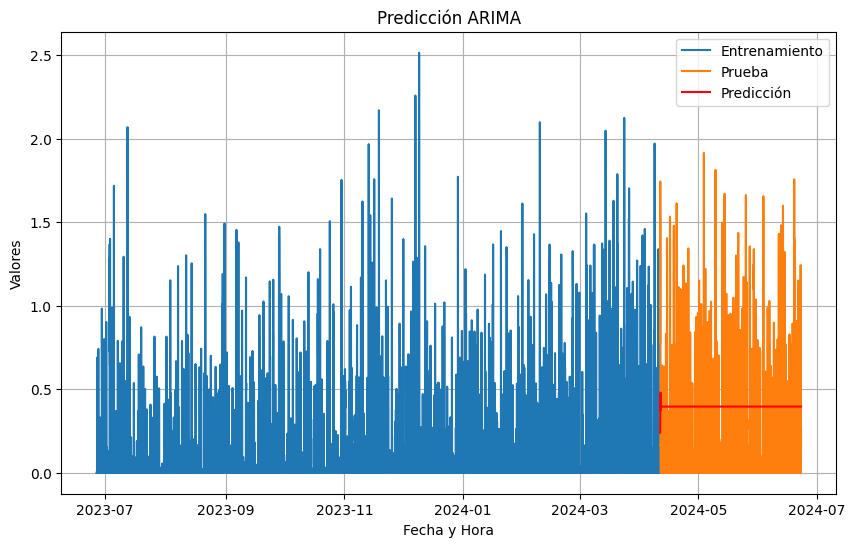

RMSE: 0.4060544304417674

Validación del modelo


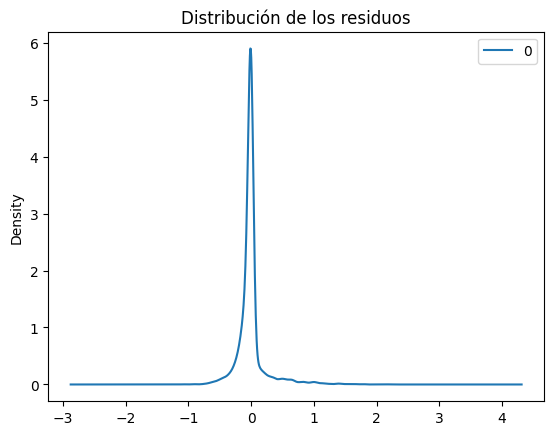

                  0
count  6.956000e+03
mean   1.499440e-04
std    2.362963e-01
min   -1.079578e+00
25%   -6.131931e-02
50%   -5.415632e-03
75%    6.526647e-20
max    2.514800e+00


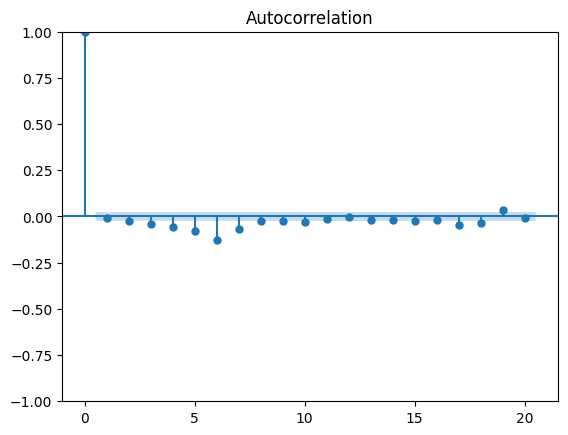

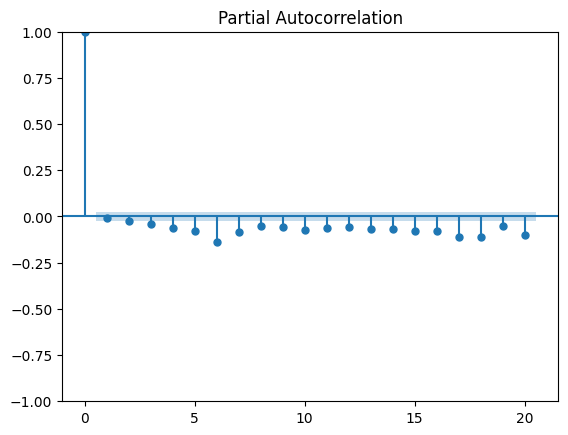


Predicción futura


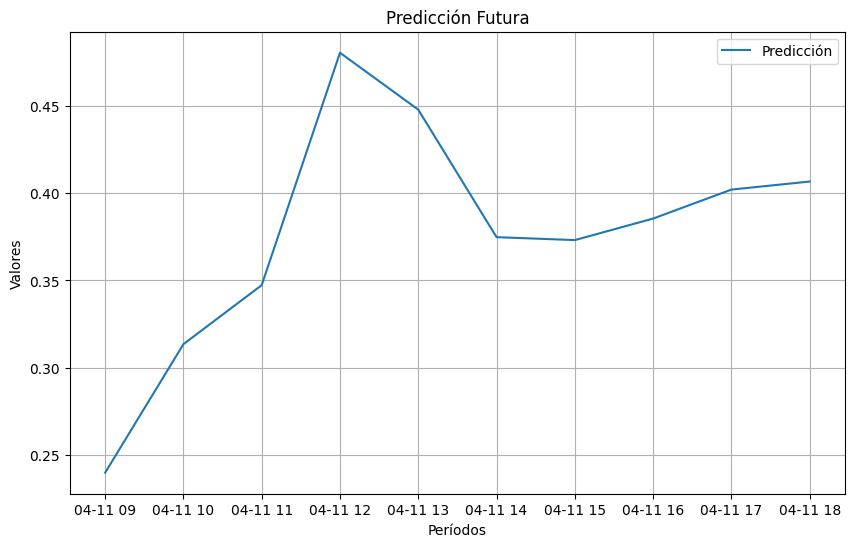


--- Procesando Tomacorriente_PB_Lavadora ---


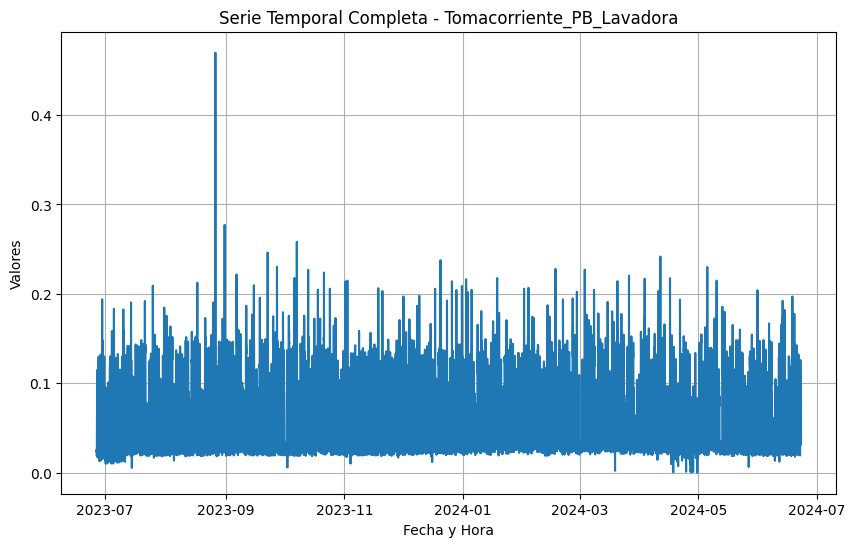

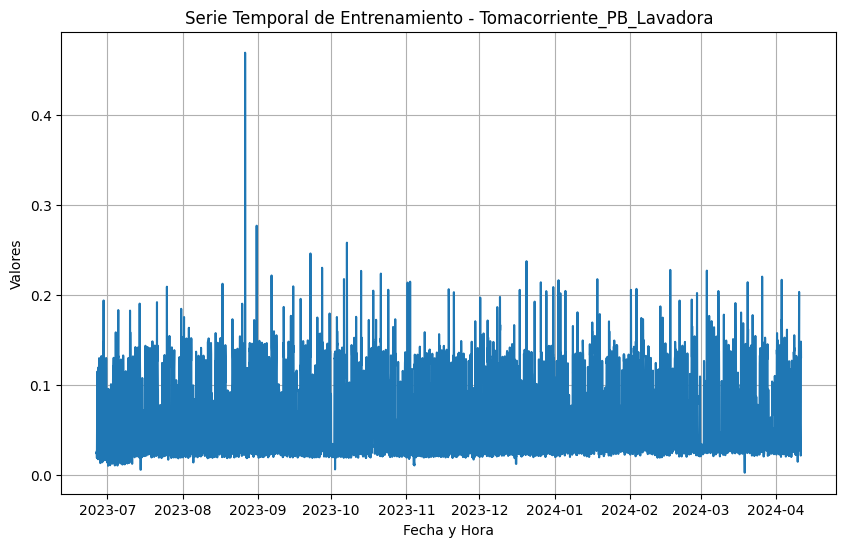

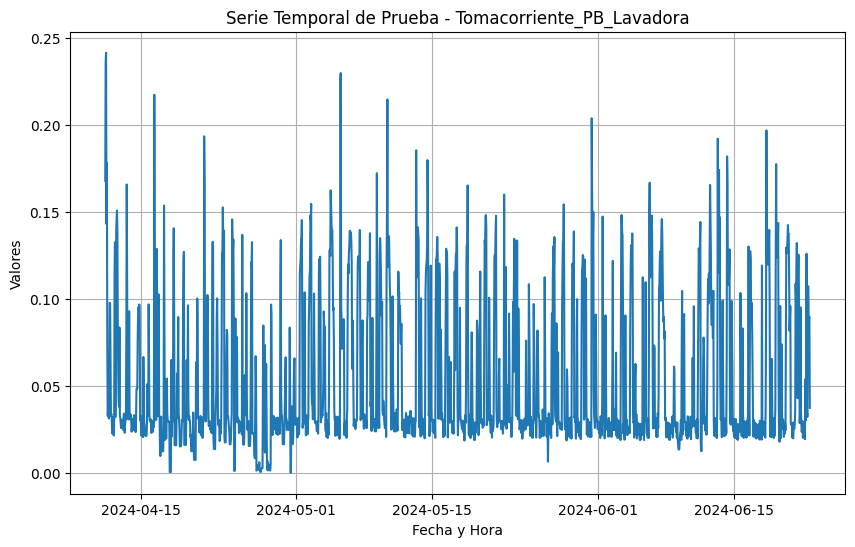


Prueba de Dickey-Fuller:
ADF Statistic: -13.060330015347384
p-value: 2.0537407321565406e-24
Critical Values: 1%, -3.431294790002609
Critical Values: 5%, -2.861957520556243
Critical Values: 10%, -2.5669922423007443
La serie es estacionaria

Descomposición de la serie temporal:


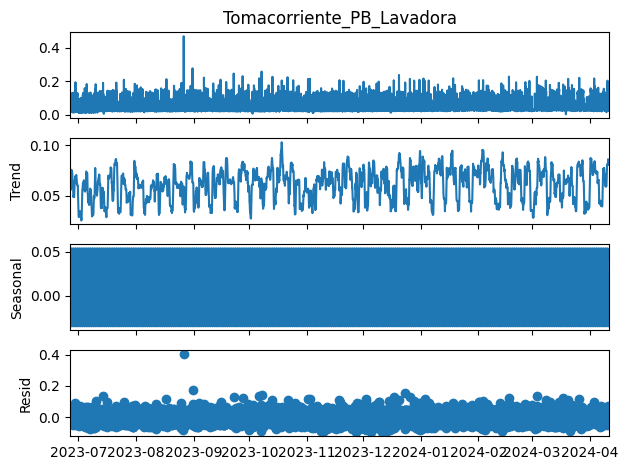


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=22.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-28709.026, Time=1.77 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-28707.772, Time=1.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-28707.729, Time=1.93 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-28711.024, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=18.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 46.108 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 6956
Model:               SARIMAX(0, 1, 0)   Log Likelihood               14356.512
Date:                Thu, 11 Jul 2024   AIC                         -28711.024
Time:                        03:42:44   BIC                         -28704.177
Sample:                    06-26-2023   HQIC                

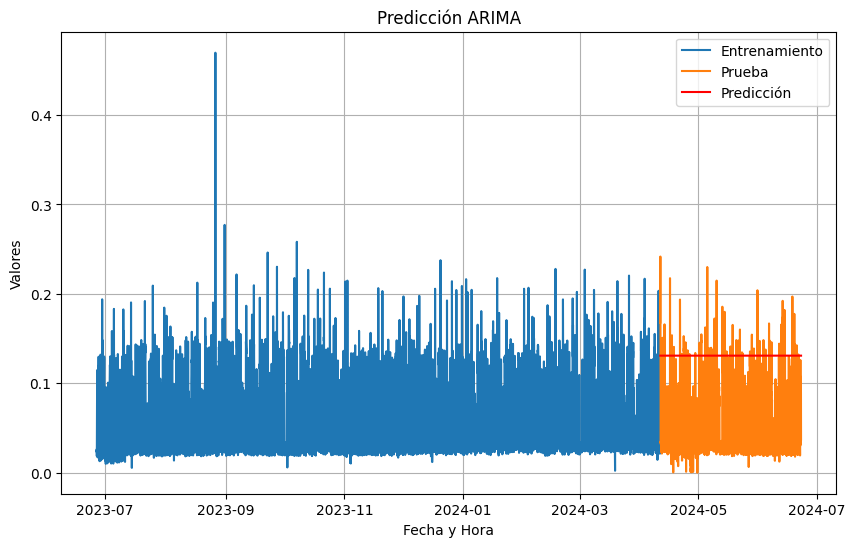

RMSE: 0.08915892121230706

Validación del modelo


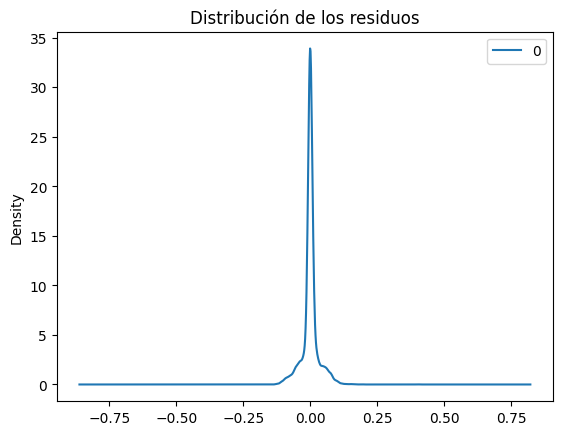

                 0
count  6956.000000
mean      0.000019
std       0.030712
min      -0.441200
25%      -0.007400
50%      -0.000200
75%       0.007300
max       0.400500


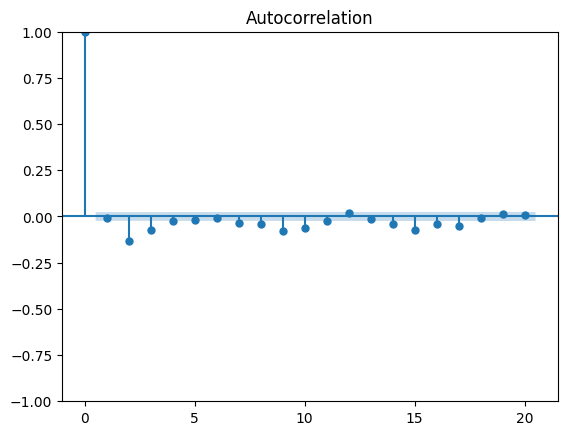

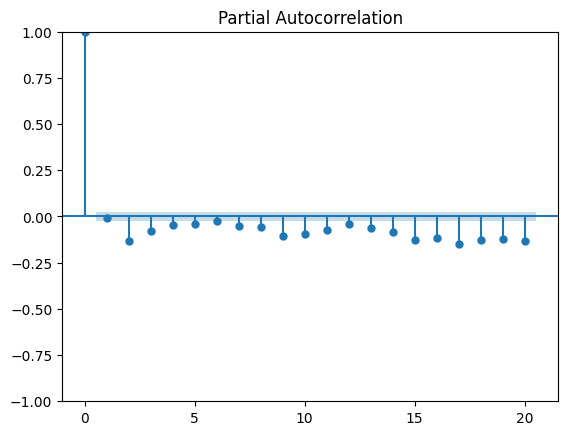


Predicción futura


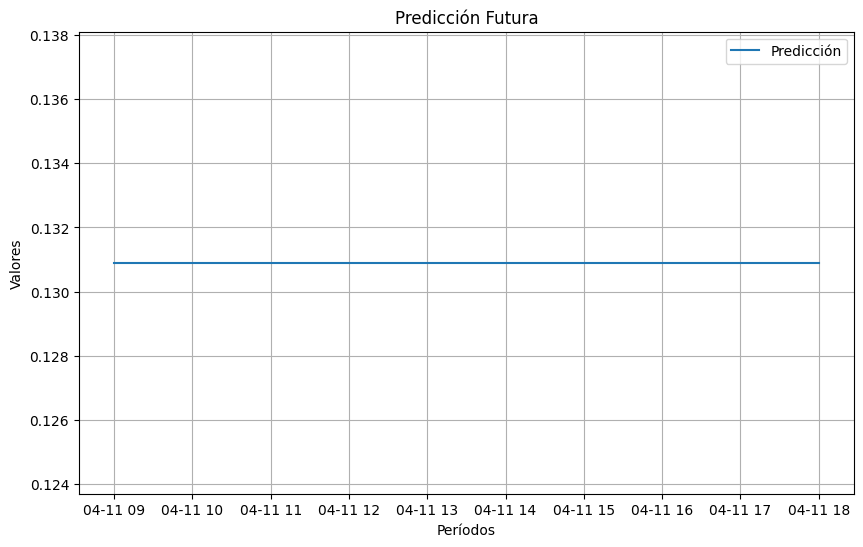


--- Procesando Tomacorriente_PA ---


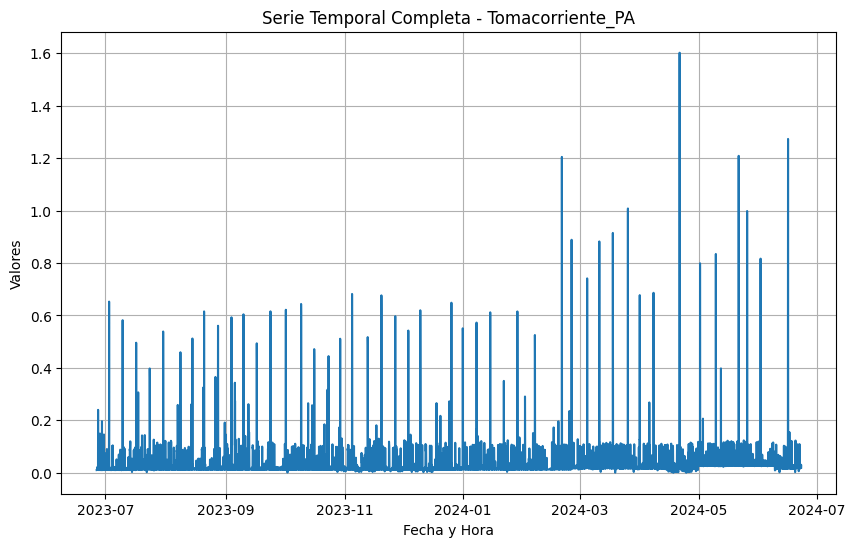

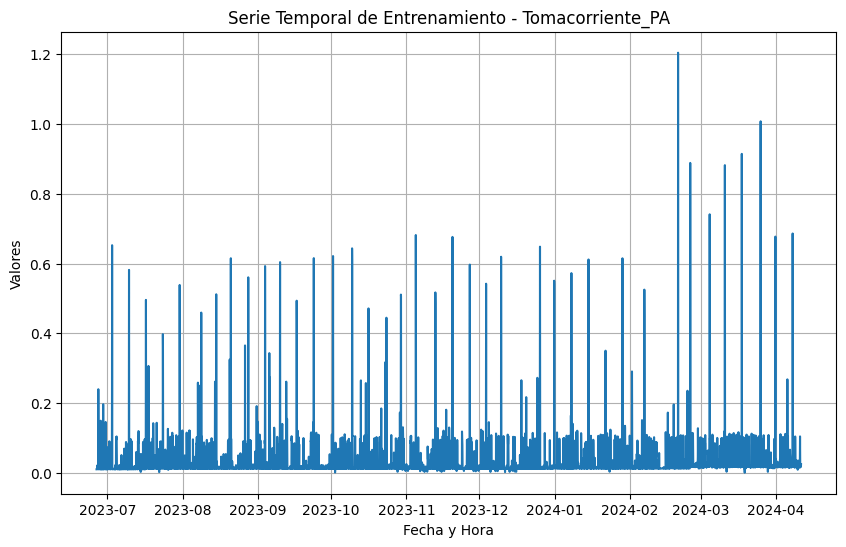

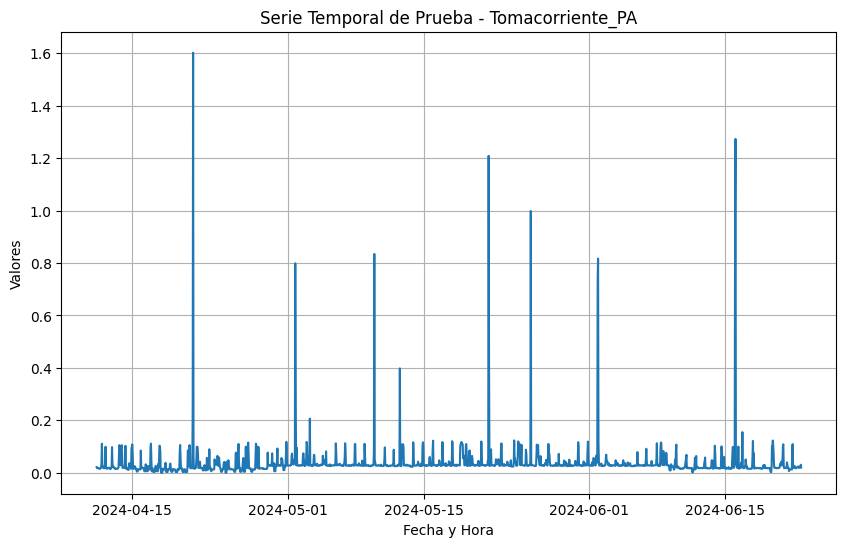


Prueba de Dickey-Fuller:
ADF Statistic: -14.818425188635704
p-value: 1.9807107783283824e-27
Critical Values: 1%, -3.431293835453219
Critical Values: 5%, -2.8619570987898078
Critical Values: 10%, -2.5669920177868453
La serie es estacionaria

Descomposición de la serie temporal:


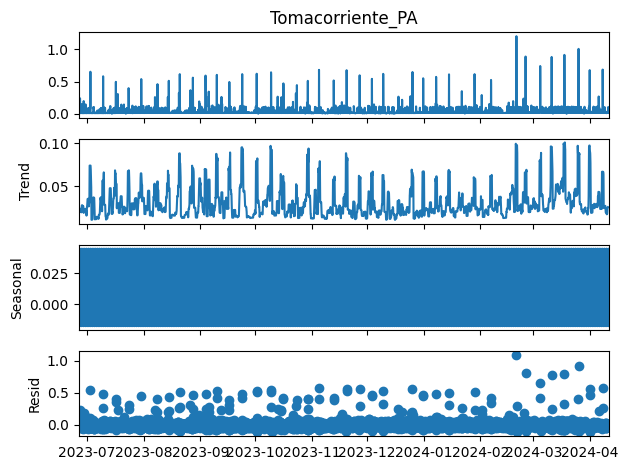


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=8.31 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-17161.499, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-20469.617, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-20148.094, Time=1.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-20549.229, Time=0.96 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-20729.326, Time=2.82 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-20732.306, Time=3.66 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=-20769.521, Time=4.43 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=-20895.219, Time=9.28 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-20725.435, Time=6.07 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=inf, Time=17.16 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=9.01 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-21166.228, Time=11.53 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-21167.992, Time=13.18

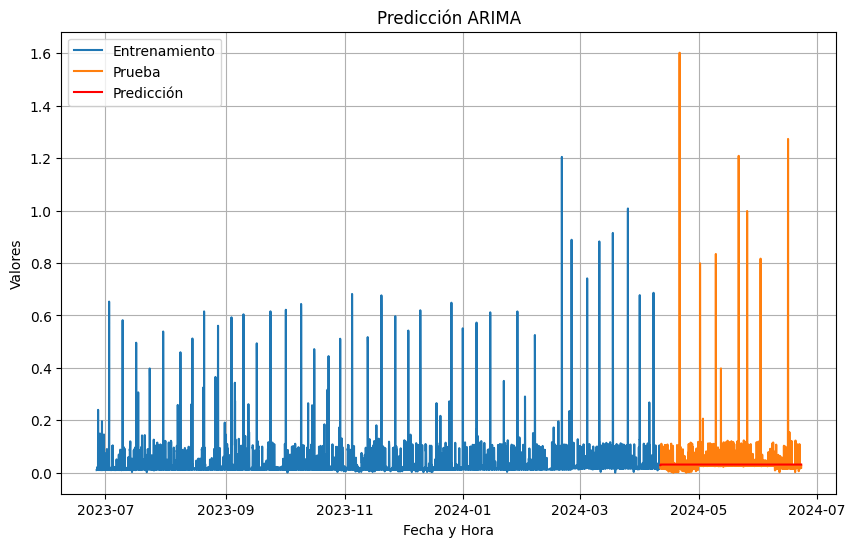

RMSE: 0.07964311063496575

Validación del modelo


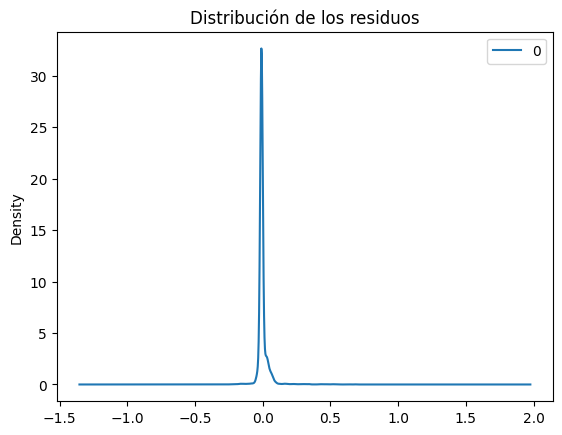

                 0
count  6956.000000
mean      0.000004
std       0.052790
min      -0.521084
25%      -0.010506
50%      -0.009853
75%      -0.005161
max       1.143455


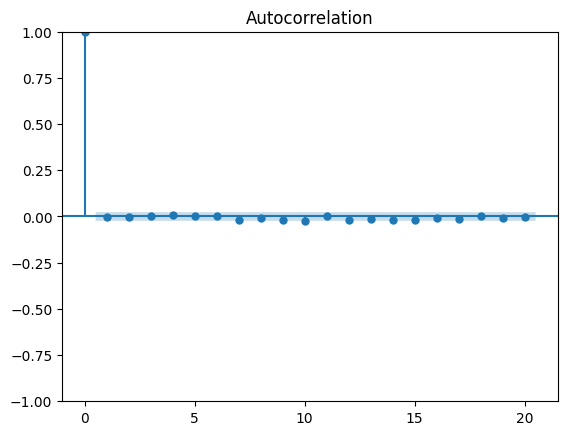

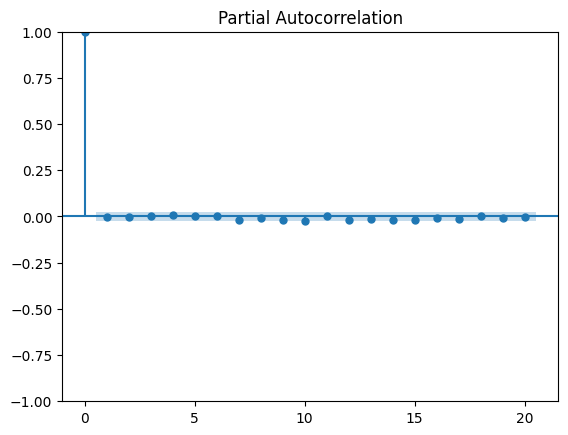


Predicción futura


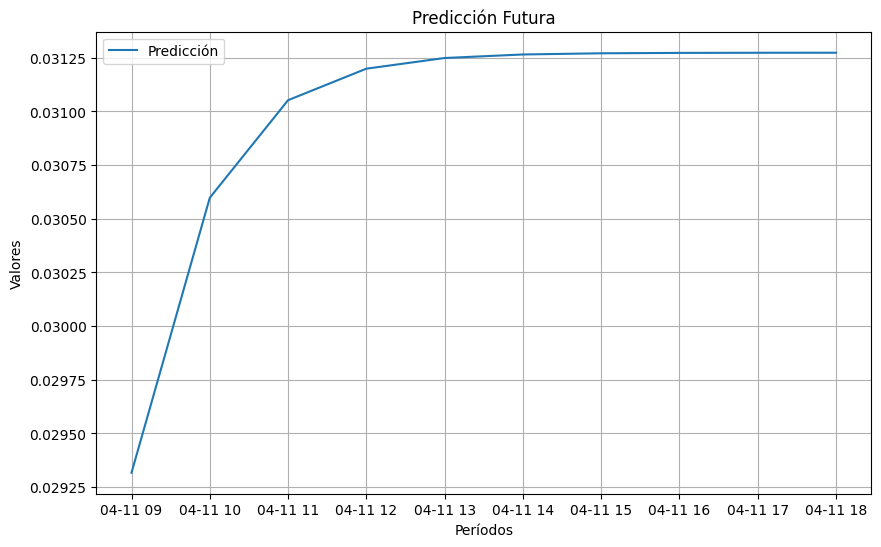


--- Procesando AireAcondicionado_Cuarto1 ---


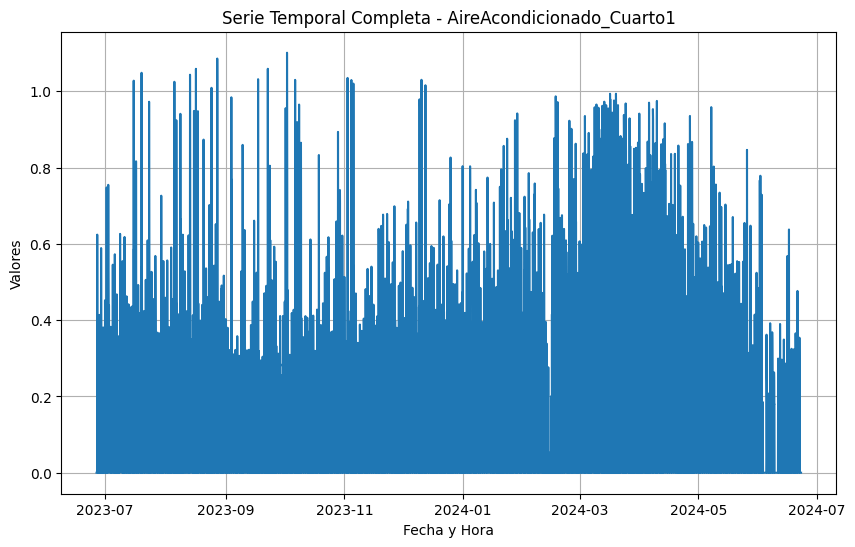

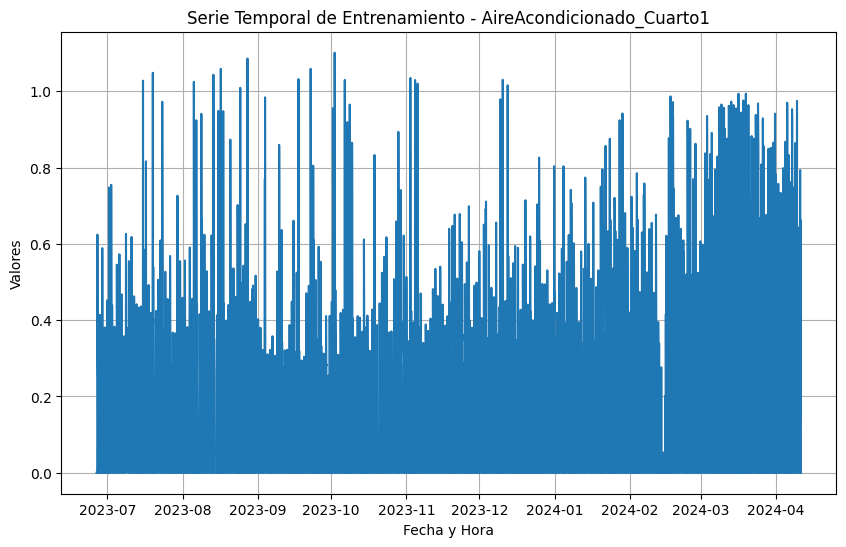

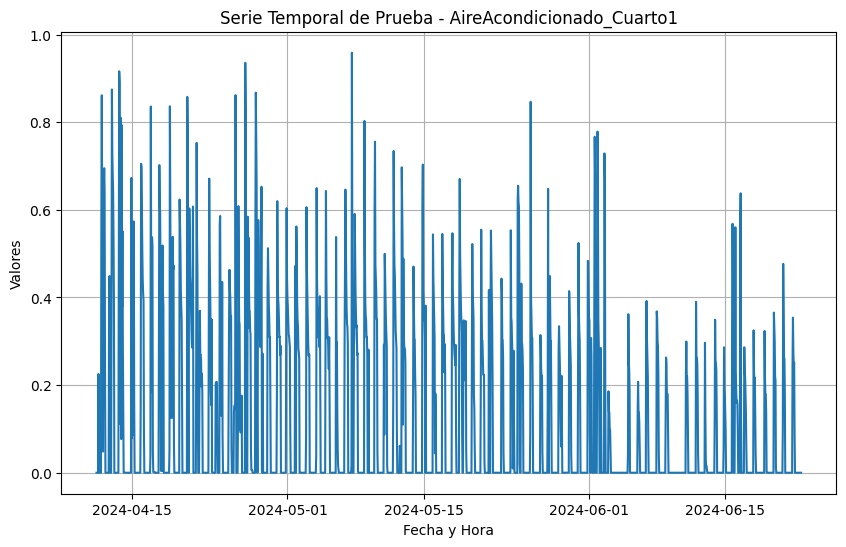


Prueba de Dickey-Fuller:
ADF Statistic: -9.134152291587062
p-value: 2.9667654462303595e-15
Critical Values: 1%, -3.431293835453219
Critical Values: 5%, -2.8619570987898078
Critical Values: 10%, -2.5669920177868453
La serie es estacionaria

Descomposición de la serie temporal:


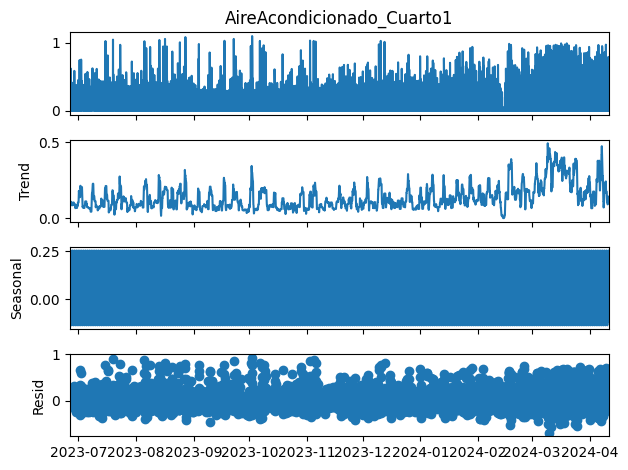


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=13.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4416.361, Time=1.45 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4418.138, Time=2.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4420.549, Time=1.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4418.361, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=10.64 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4901.074, Time=3.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-5779.779, Time=12.99 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=19.26 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=19.85 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=12.54 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=21.85 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=3.90 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 123.804 seconds
              

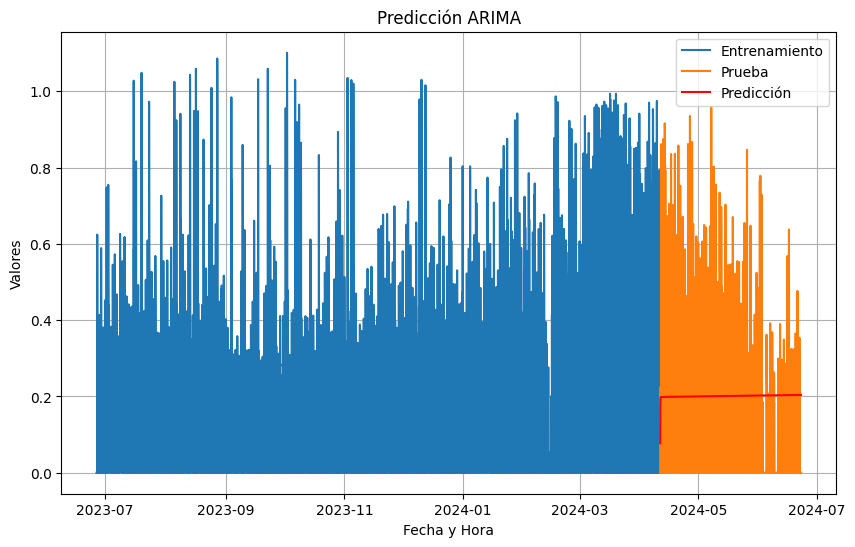

RMSE: 0.21212706183754151

Validación del modelo


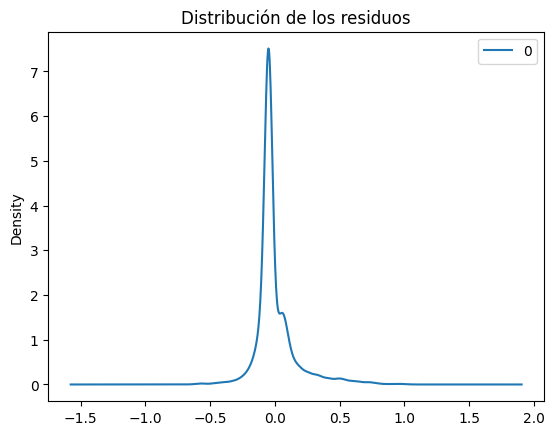

                 0
count  6956.000000
mean      0.000485
std       0.159573
min      -0.706026
25%      -0.060296
50%      -0.042878
75%       0.035423
max       1.035353


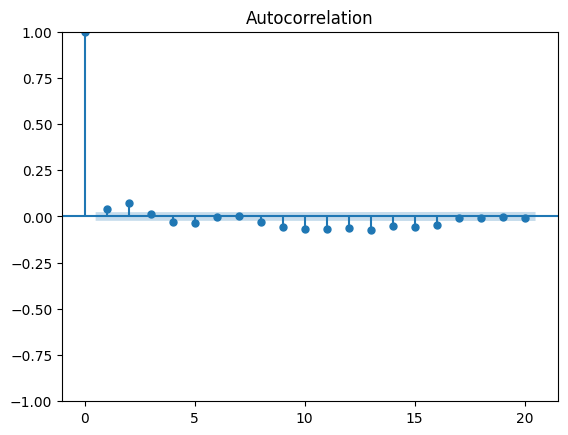

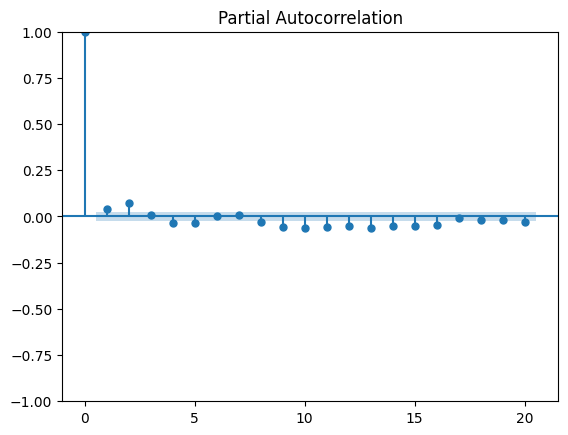


Predicción futura


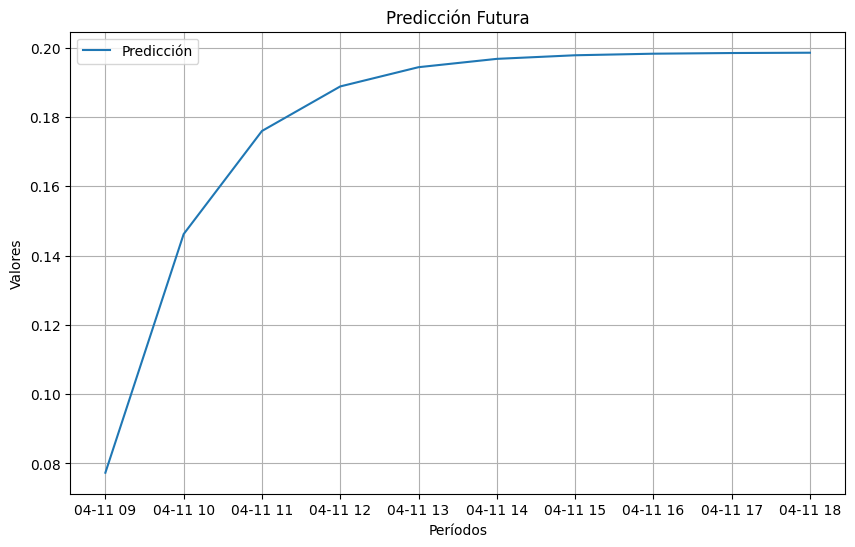


--- Procesando AireAcondicionado_Cuarto2 ---


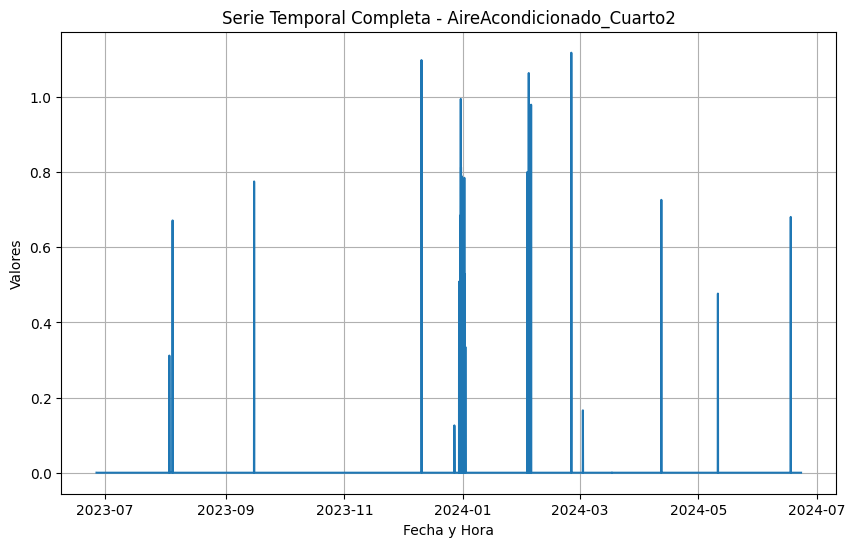

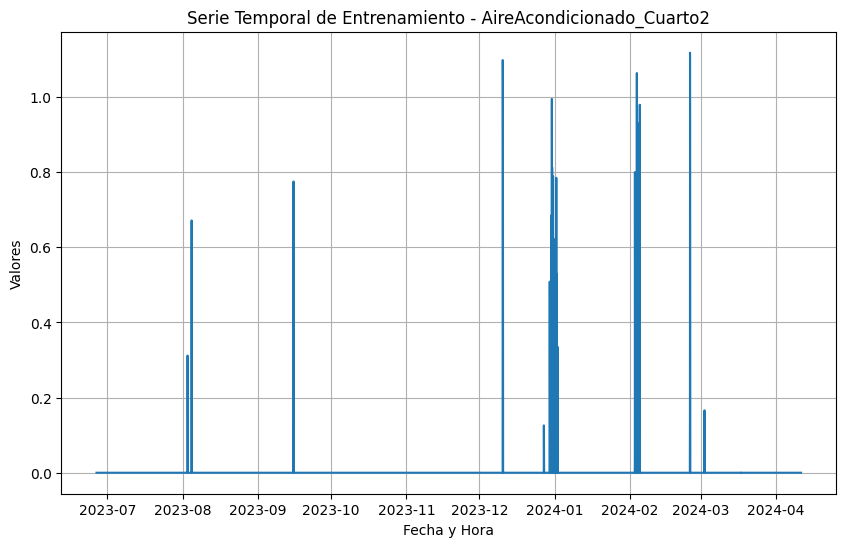

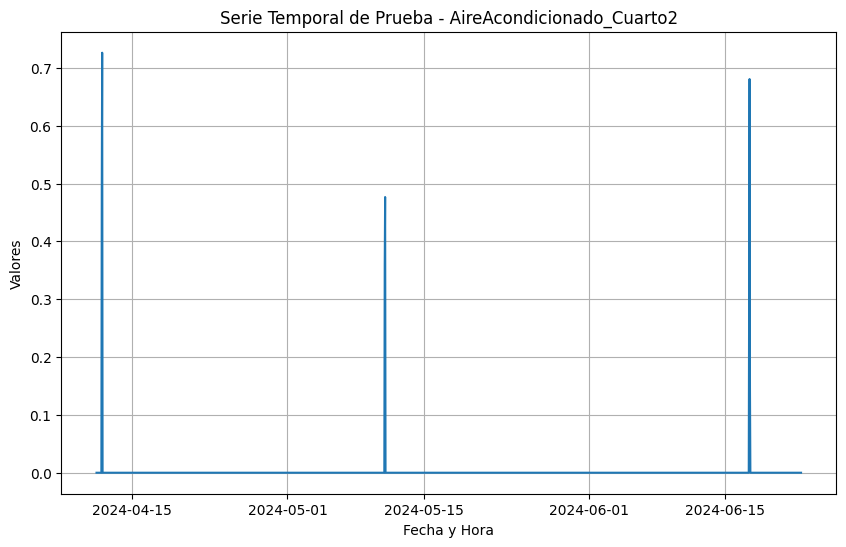


Prueba de Dickey-Fuller:
ADF Statistic: -9.335549857174314
p-value: 9.083636560054257e-16
Critical Values: 1%, -3.4312953363267806
Critical Values: 5%, -2.8619577619488235
Critical Values: 10%, -2.5669923707983897
La serie es estacionaria

Descomposición de la serie temporal:


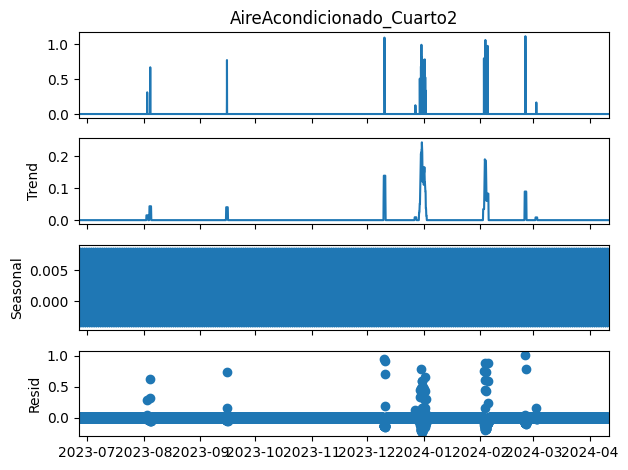


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-23179.505, Time=15.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20681.087, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-21074.364, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-22223.051, Time=3.89 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-20683.087, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-23194.702, Time=13.22 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-23195.759, Time=10.82 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-23194.582, Time=16.77 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-23023.063, Time=12.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-23150.231, Time=14.70 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-23197.776, Time=2.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-22225.052, Time=1.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-23196.713, Time=3.48 sec
 ARIMA(0,1,3)(0,0,0)[0]             : A

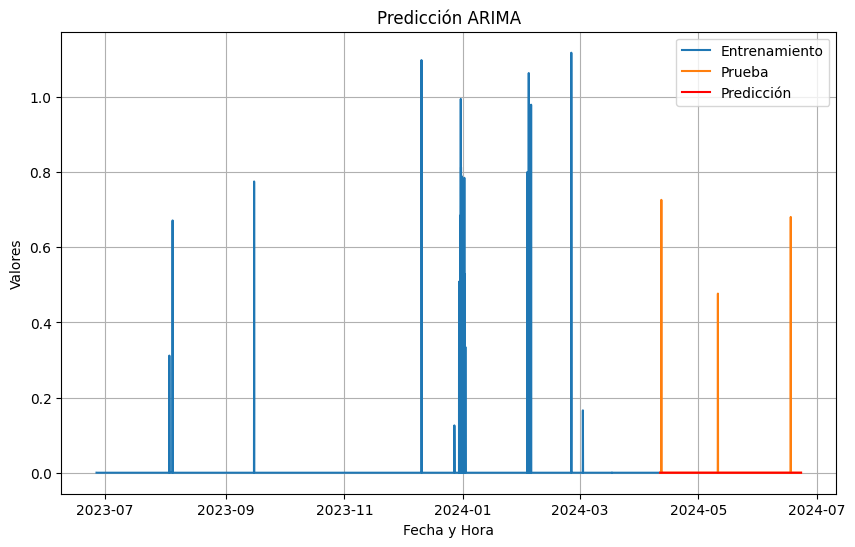

RMSE: 0.03151008217849793

Validación del modelo


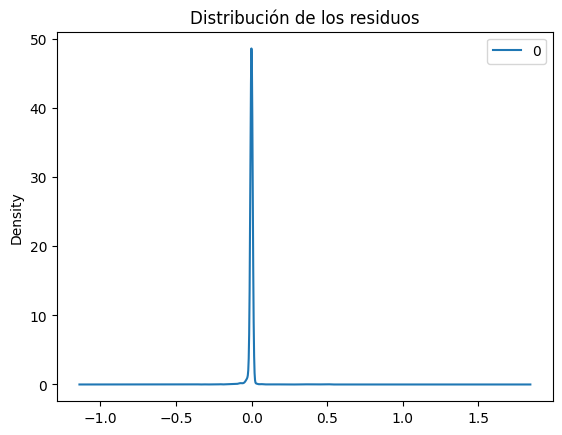

                  0
count  6.956000e+03
mean  -4.471863e-08
std    4.476296e-02
min   -3.927694e-01
25%   -1.093243e-05
50%   -2.938516e-09
75%   -9.939132e-15
max    1.098200e+00


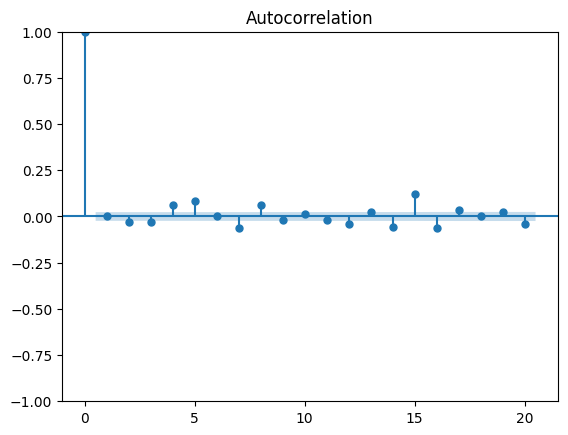

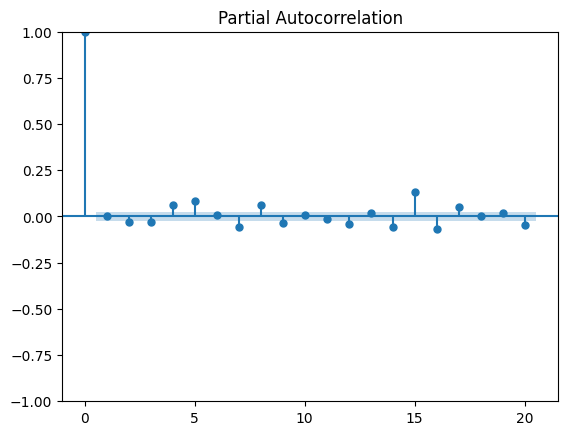


Predicción futura


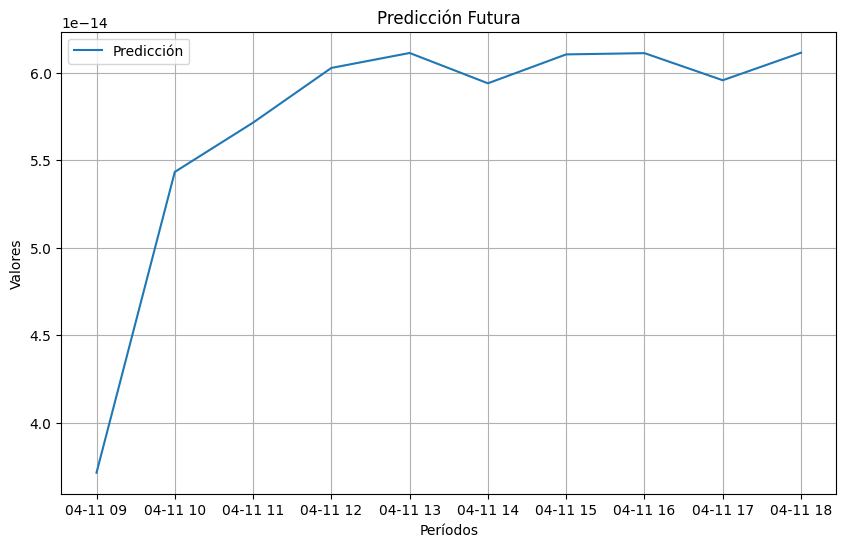


--- Procesando AireAcondicionado_Sala ---


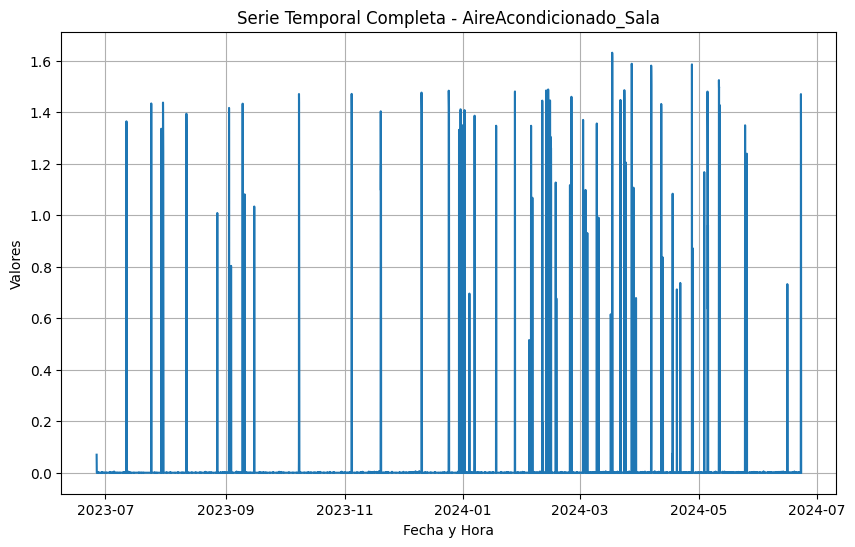

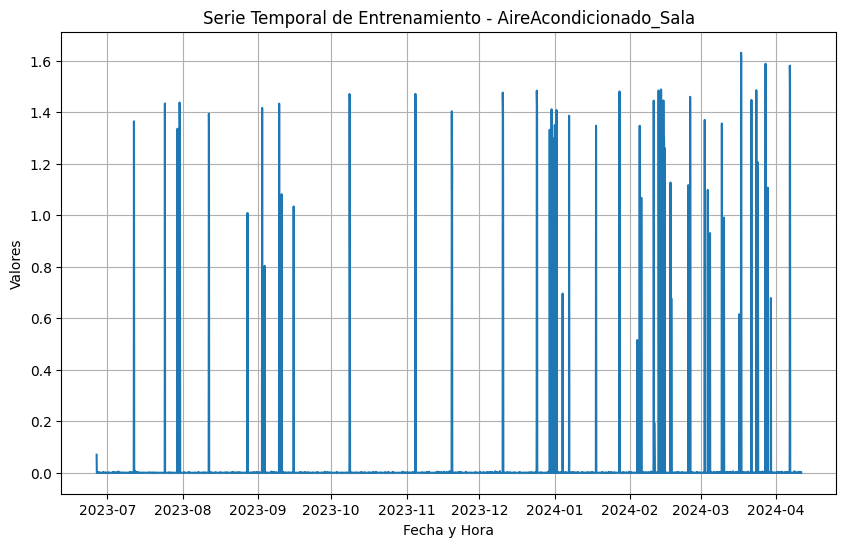

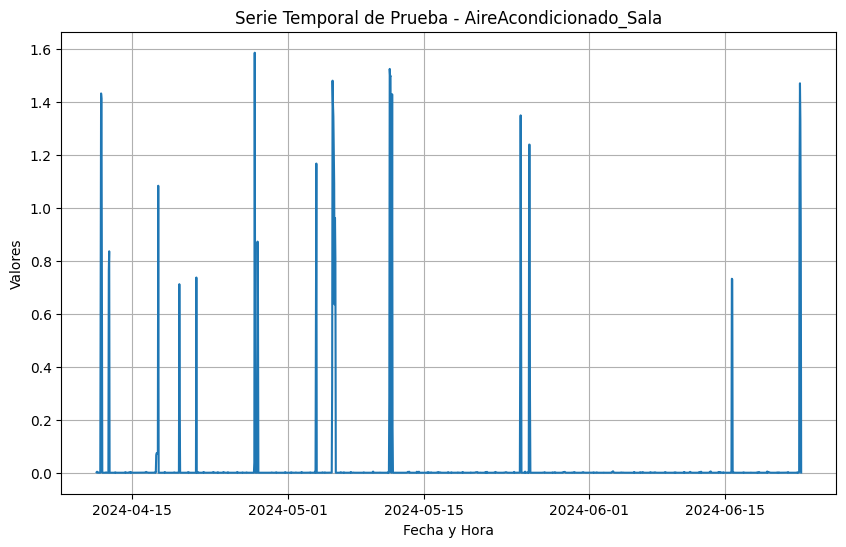


Prueba de Dickey-Fuller:
ADF Statistic: -9.942941752151642
p-value: 2.6348463714893836e-17
Critical Values: 1%, -3.4312945170772515
Critical Values: 5%, -2.8619573999645342
Critical Values: 10%, -2.566992178107595
La serie es estacionaria

Descomposición de la serie temporal:


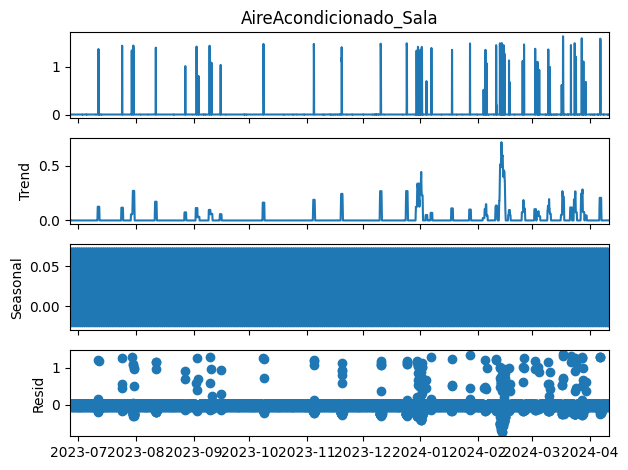


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-9164.411, Time=15.85 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-7715.267, Time=0.77 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-7716.050, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-7718.762, Time=1.71 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-7717.267, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-9213.679, Time=18.65 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-8621.994, Time=5.85 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=10.63 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-9207.272, Time=15.41 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-9088.100, Time=13.35 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-9197.407, Time=12.66 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-9210.635, Time=22.99 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-9215.713, Time=3.28 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-8623.994, Time

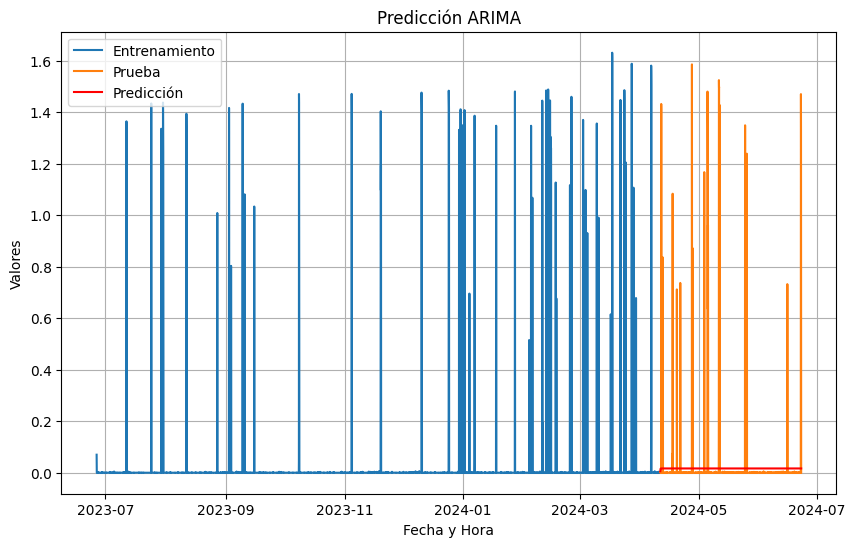

RMSE: 0.1639159716147791

Validación del modelo


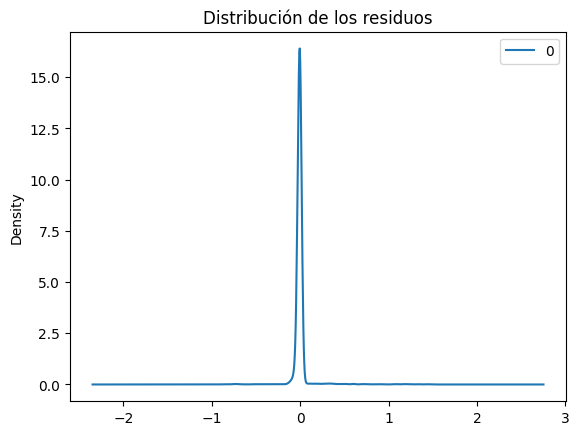

                 0
count  6956.000000
mean      0.000036
std       0.124657
min      -1.073238
25%      -0.011625
50%      -0.004104
75%      -0.000698
max       1.476432


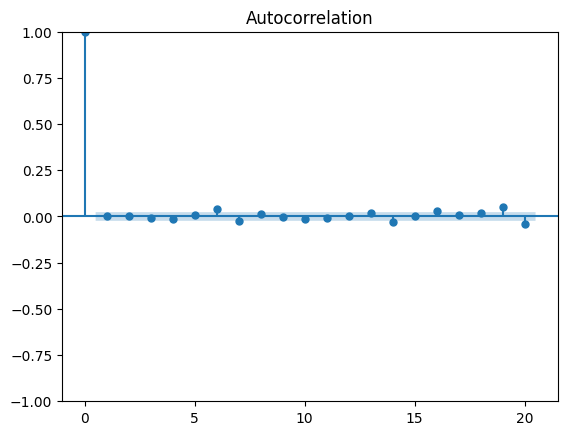

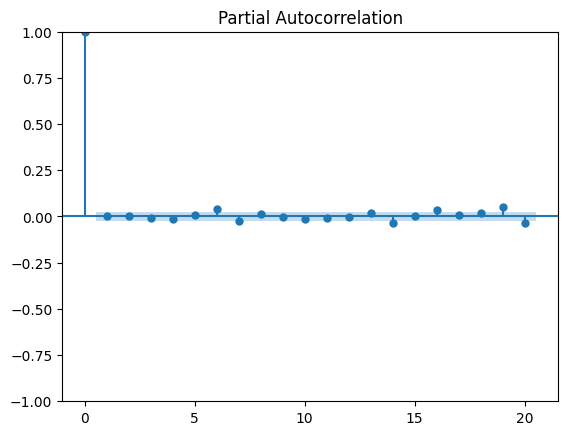


Predicción futura


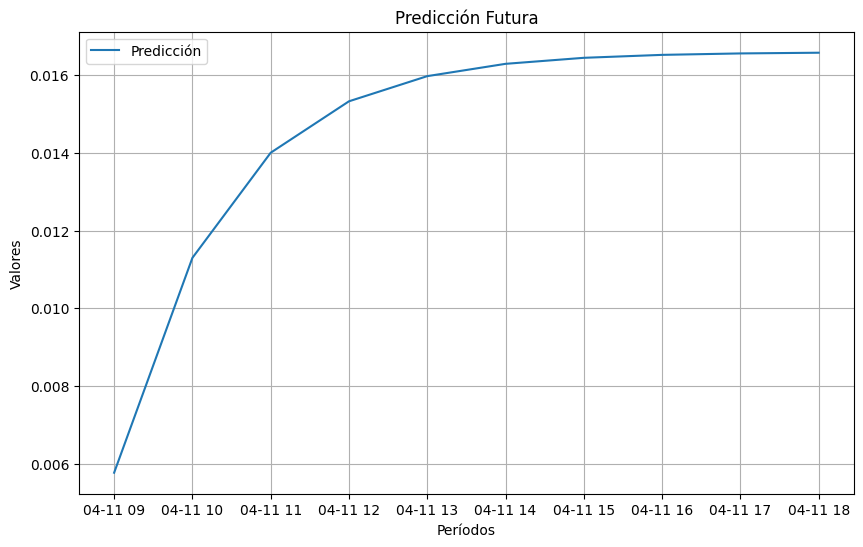


--- Procesando Iluminacion_PB ---


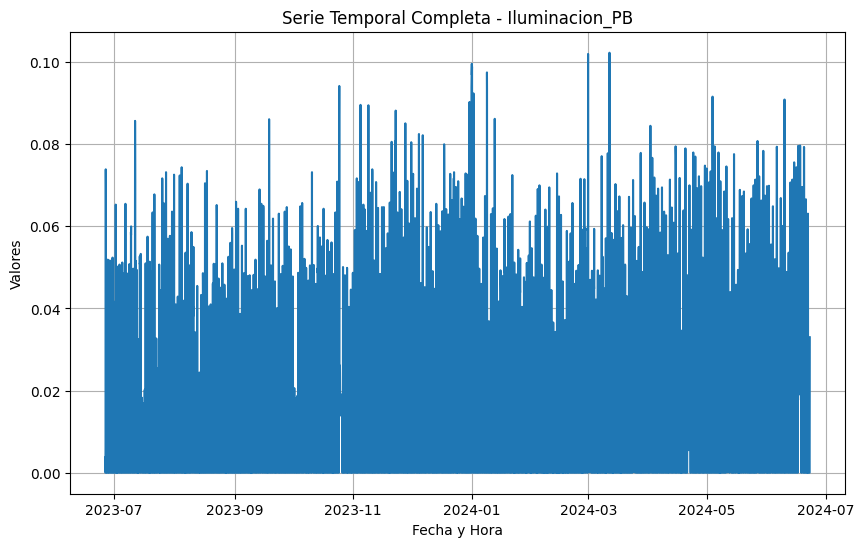

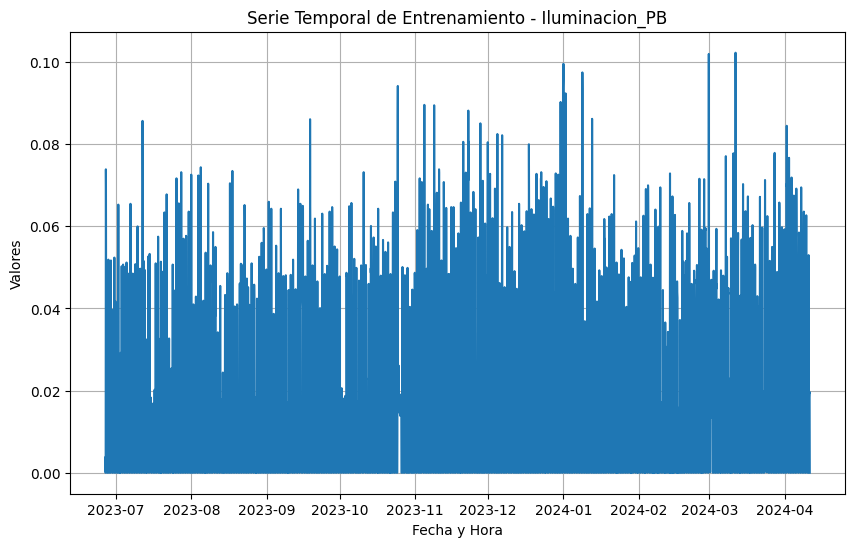

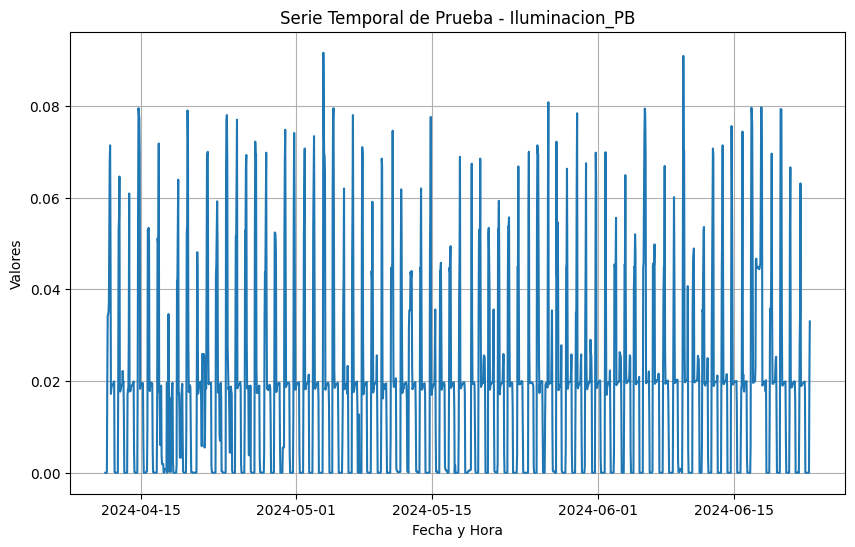


Prueba de Dickey-Fuller:
ADF Statistic: -12.212120938506512
p-value: 1.157401257873068e-22
Critical Values: 1%, -3.4312950630857397
Critical Values: 5%, -2.8619576412176526
Critical Values: 10%, -2.5669923065309983
La serie es estacionaria

Descomposición de la serie temporal:


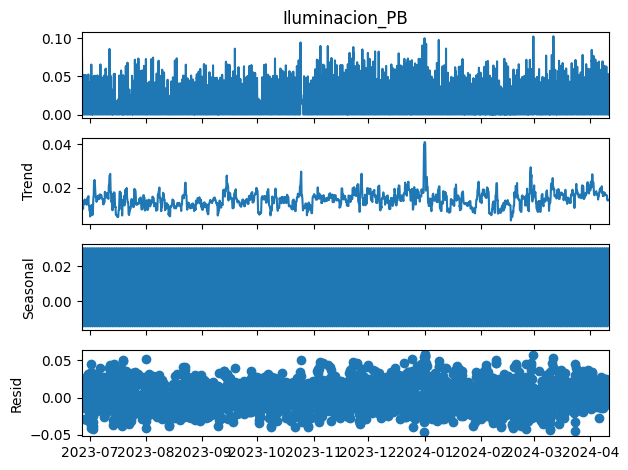


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-40888.786, Time=17.82 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-40721.122, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-40799.127, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-40834.912, Time=6.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-40723.122, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-41998.064, Time=14.27 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-41027.540, Time=3.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-40791.560, Time=5.28 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-41852.128, Time=14.79 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-41801.304, Time=20.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-41604.765, Time=14.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-41882.137, Time=6.55 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=6.77 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept


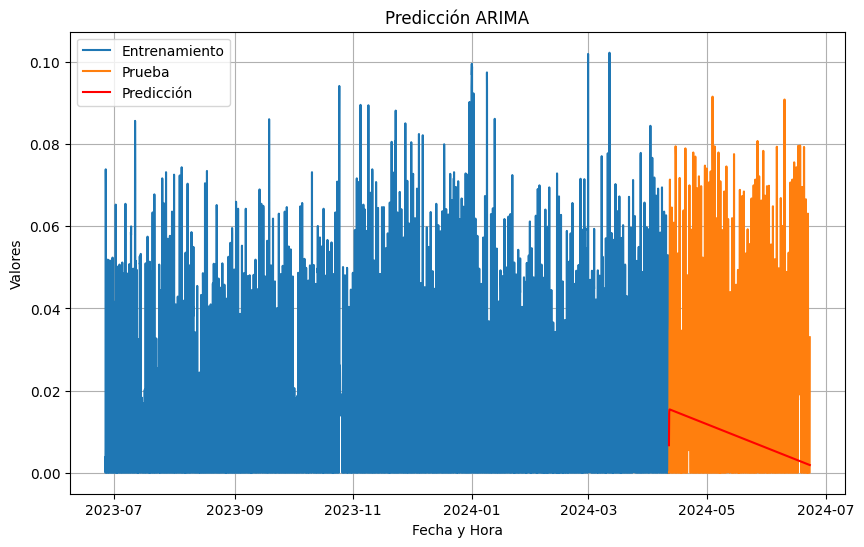

RMSE: 0.022126661650360153

Validación del modelo


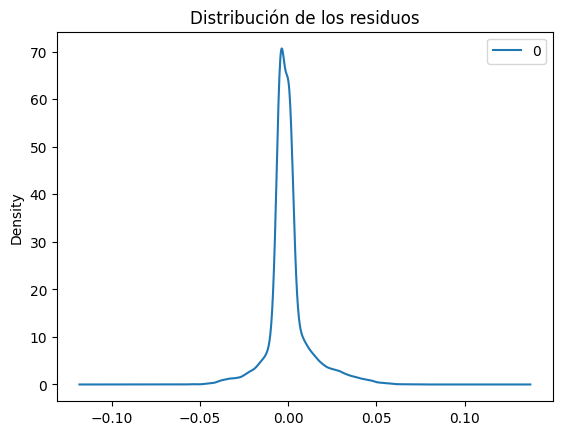

                 0
count  6956.000000
mean      0.000077
std       0.011809
min      -0.054433
25%      -0.004660
50%      -0.001208
75%       0.001897
max       0.073321


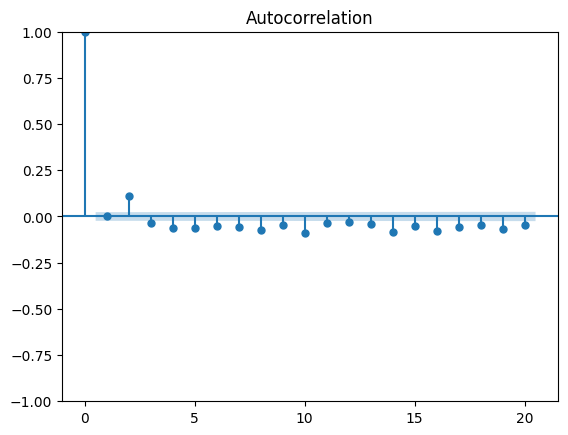

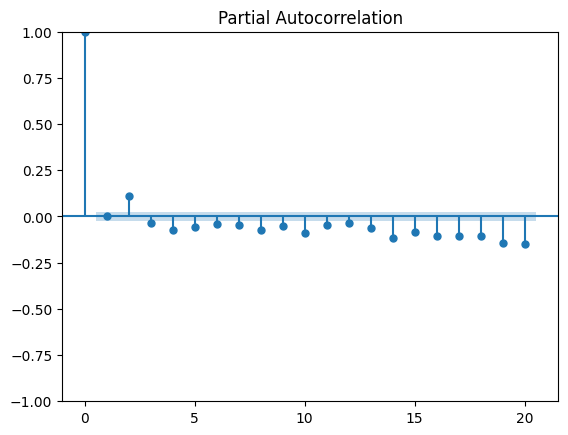


Predicción futura


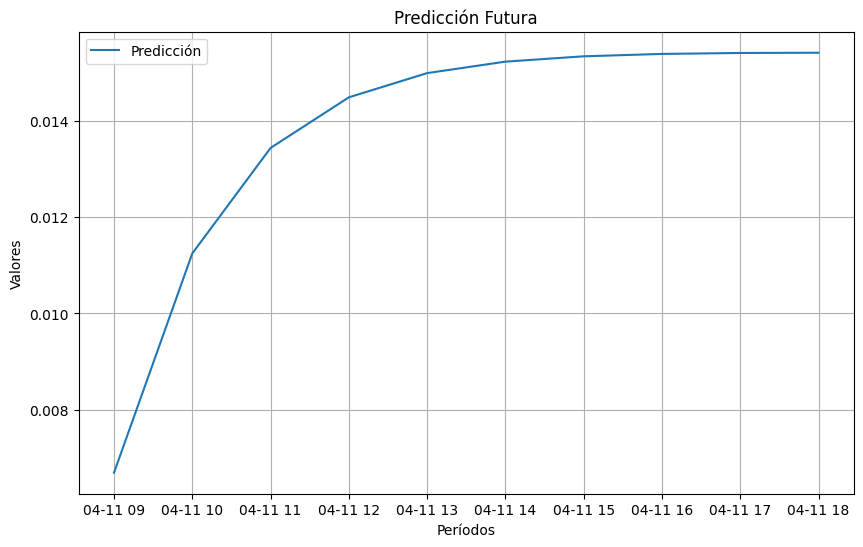


--- Procesando Iluminacion_PA ---


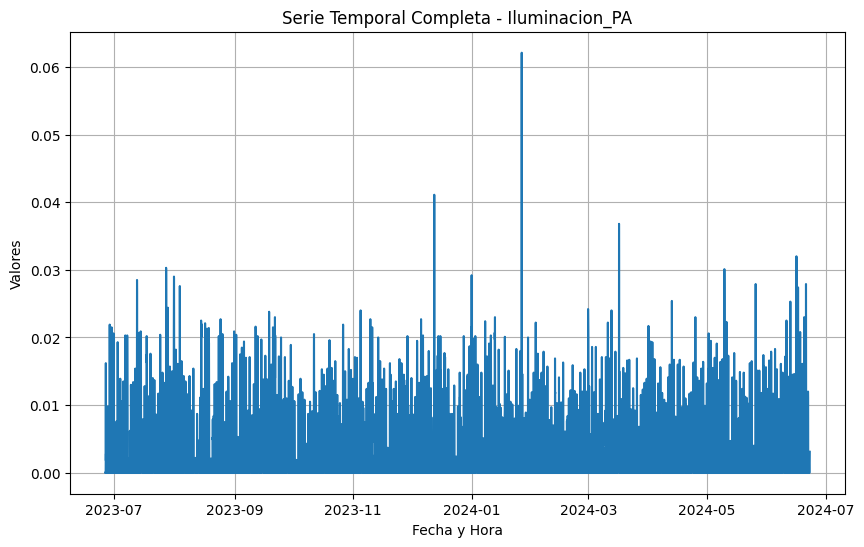

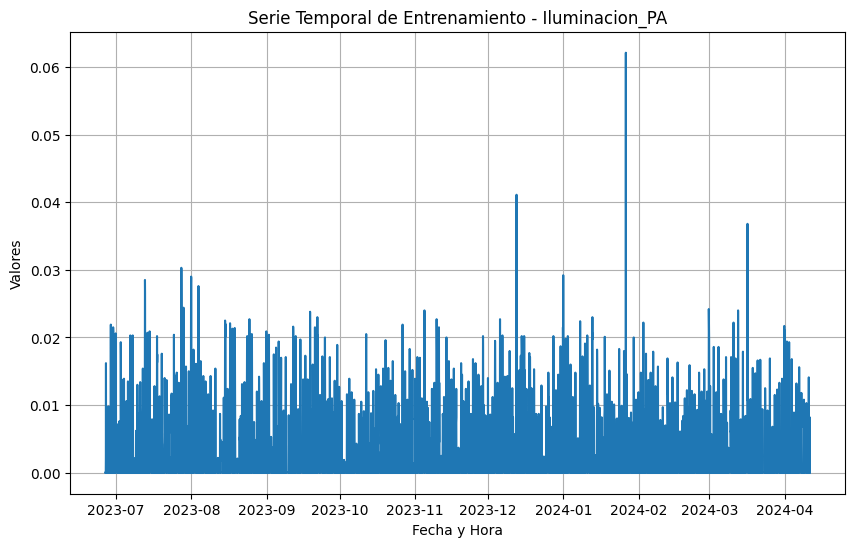

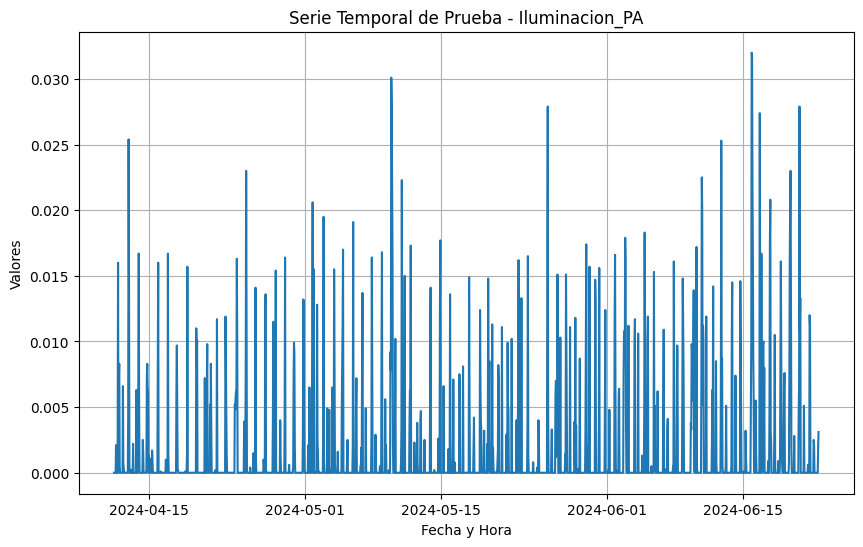


Prueba de Dickey-Fuller:
ADF Statistic: -13.208899567613486
p-value: 1.0568955608700178e-24
Critical Values: 1%, -3.4312953363267806
Critical Values: 5%, -2.8619577619488235
Critical Values: 10%, -2.5669923707983897
La serie es estacionaria

Descomposición de la serie temporal:


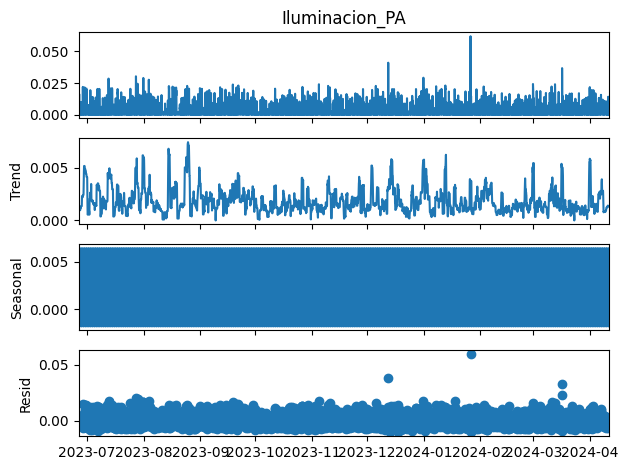


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-57024.106, Time=16.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-56390.028, Time=1.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56549.680, Time=1.51 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-56635.696, Time=2.77 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-56392.028, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-57409.369, Time=4.92 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-57023.893, Time=3.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-57392.667, Time=11.74 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-57768.884, Time=19.73 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-57337.204, Time=7.68 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-57748.803, Time=5.91 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-57860.502, Time=27.97 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-57624.896, Time=13.76 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AI

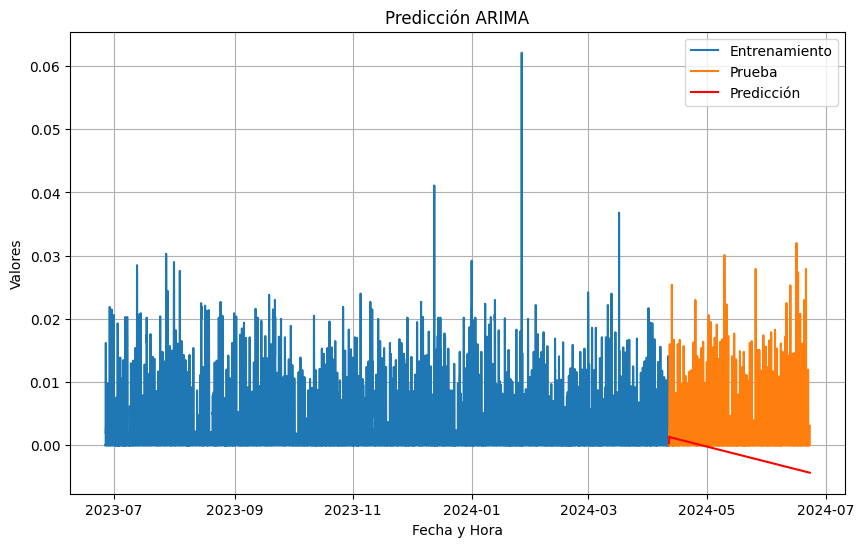

RMSE: 0.0058364402944934436

Validación del modelo


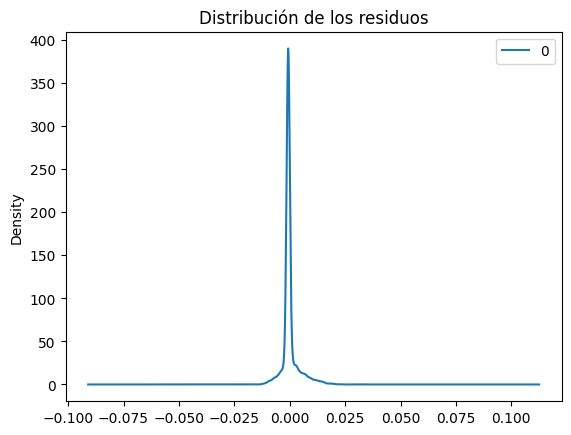

                 0
count  6956.000000
mean      0.000098
std       0.003736
min      -0.040075
25%      -0.000945
50%      -0.000627
75%      -0.000189
max       0.061661


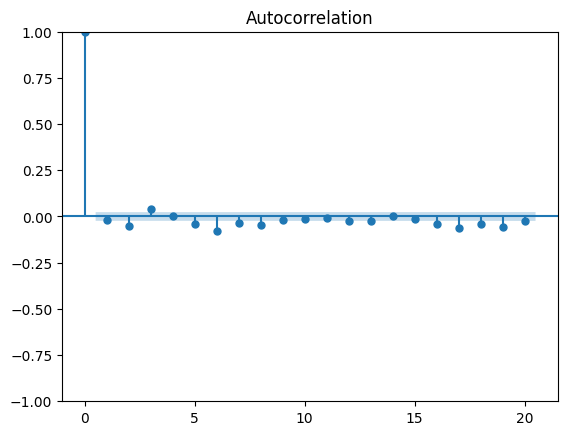

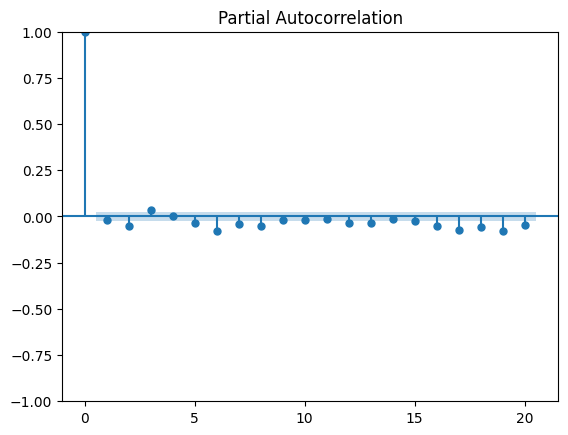


Predicción futura


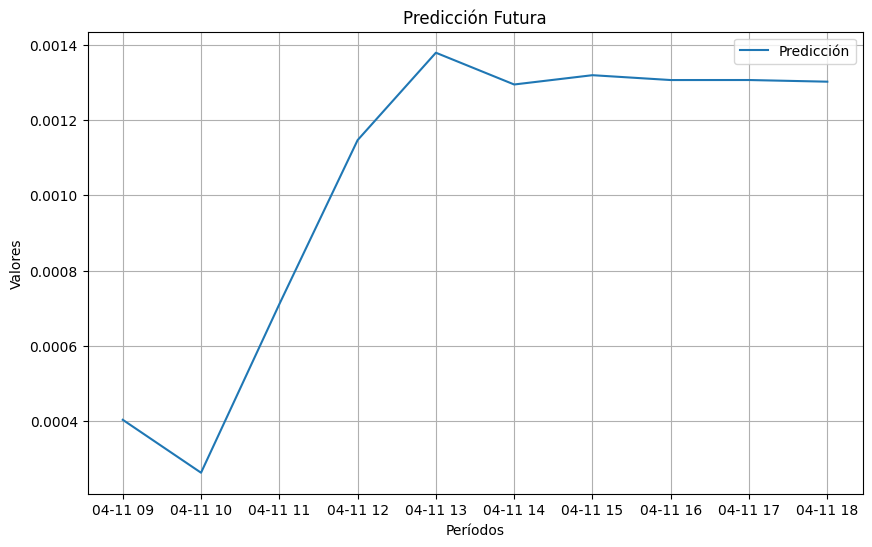


--- Procesando Bomba_Agua ---


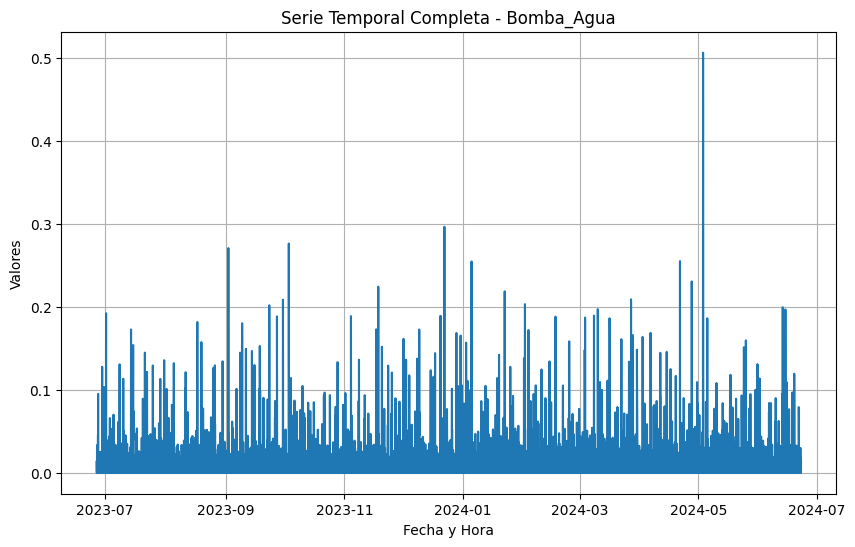

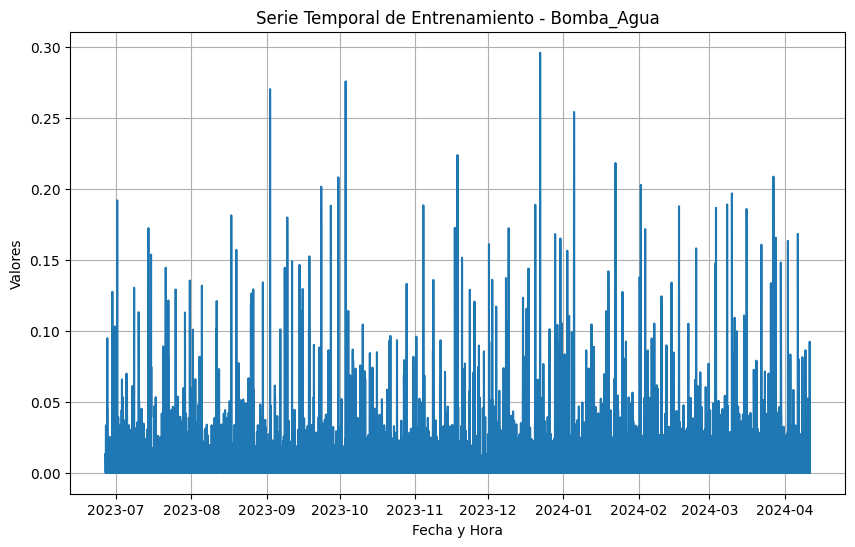

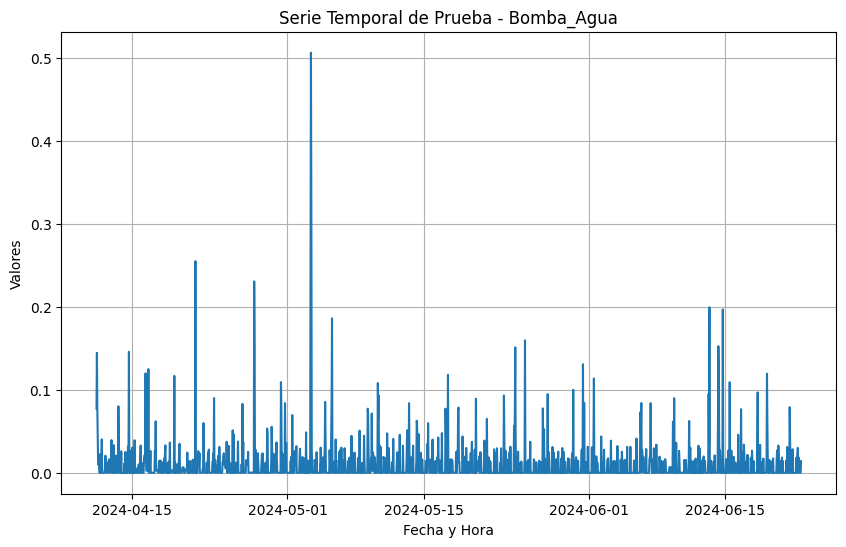


Prueba de Dickey-Fuller:
ADF Statistic: -15.038579721185277
p-value: 9.667554858857587e-28
Critical Values: 1%, -3.431294653520217
Critical Values: 5%, -2.8619574602516797
Critical Values: 10%, -2.5669922101995333
La serie es estacionaria

Descomposición de la serie temporal:


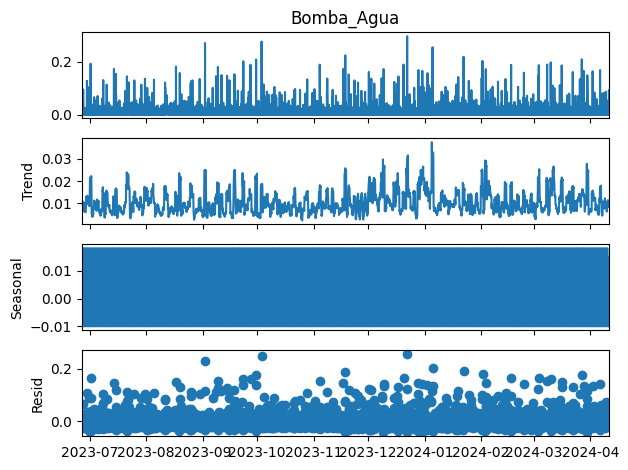


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=20.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-29924.074, Time=0.71 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-30810.691, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-29926.074, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-31315.105, Time=1.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-31618.128, Time=1.13 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-31820.897, Time=2.92 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-31955.173, Time=8.46 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-32524.847, Time=22.25 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-32672.437, Time=17.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-32550.403, Time=15.32 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=26.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-32840.971, Time=17

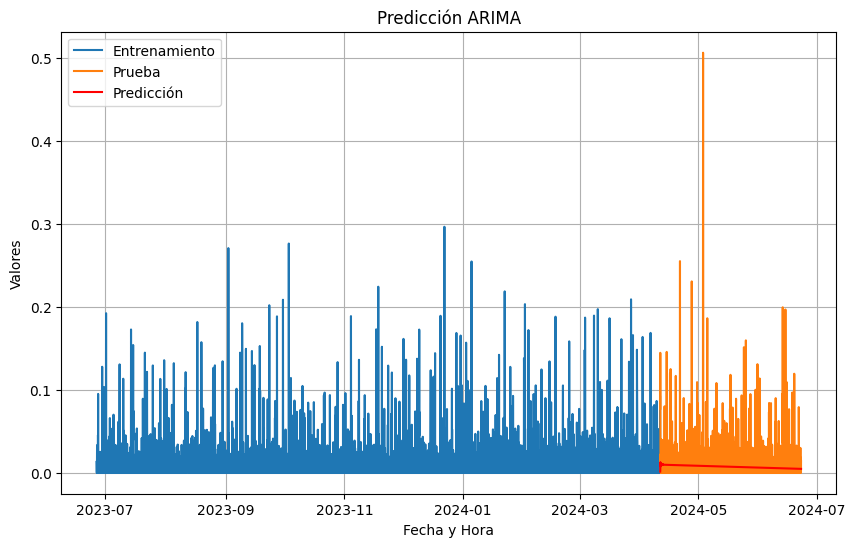

RMSE: 0.02754451686766988

Validación del modelo


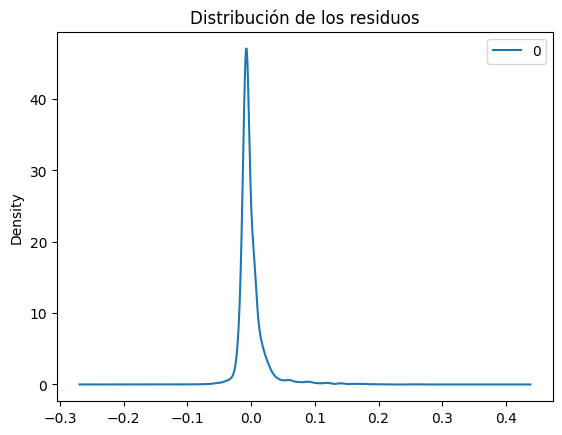

                 0
count  6956.000000
mean      0.000132
std       0.022799
min      -0.092368
25%      -0.009313
50%      -0.005755
75%       0.003742
max       0.261393


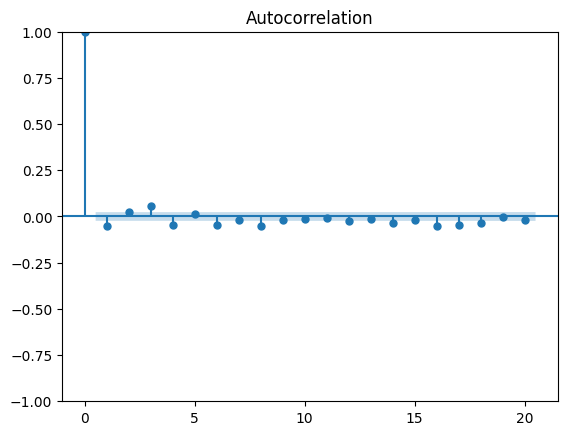

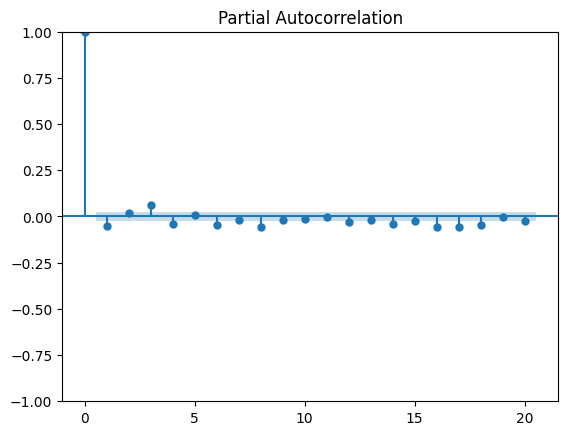


Predicción futura


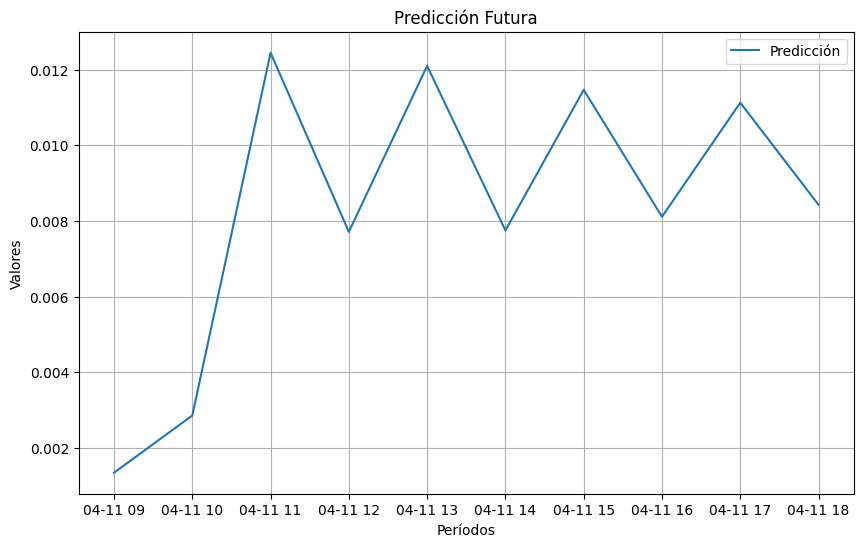


--- Procesando Balance ---


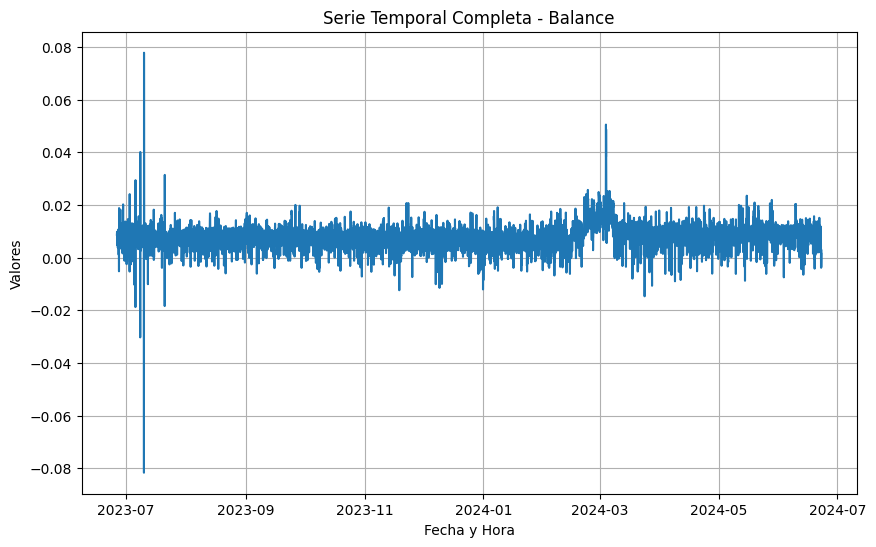

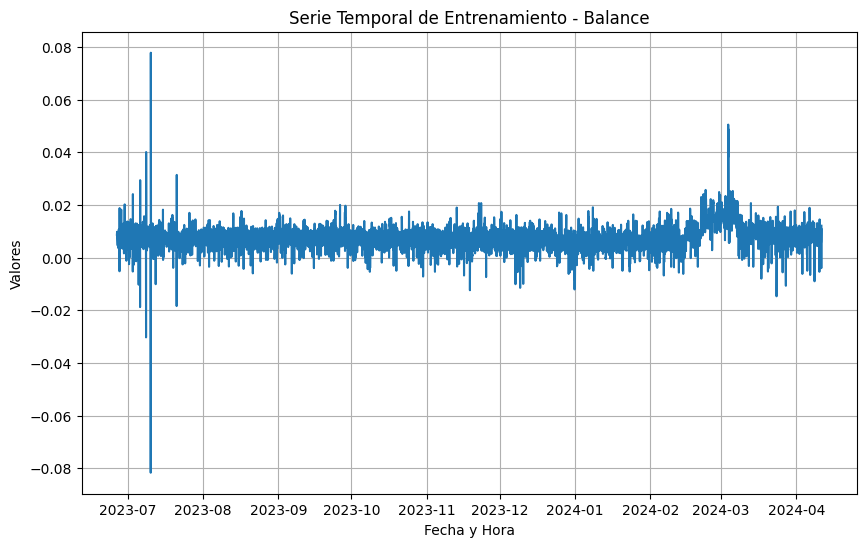

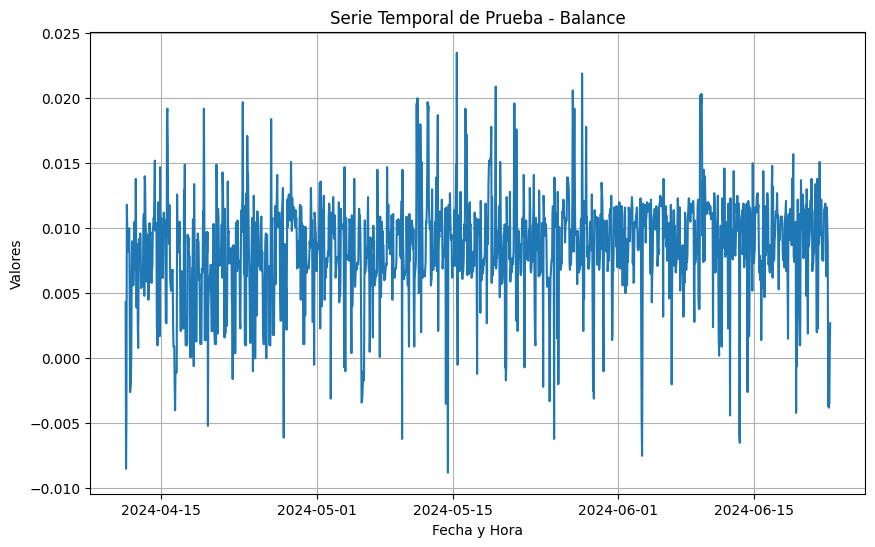


Prueba de Dickey-Fuller:
ADF Statistic: -5.671510822694672
p-value: 8.900053749952752e-07
Critical Values: 1%, -3.4312953363267806
Critical Values: 5%, -2.8619577619488235
Critical Values: 10%, -2.5669923707983897
La serie es estacionaria

Descomposición de la serie temporal:


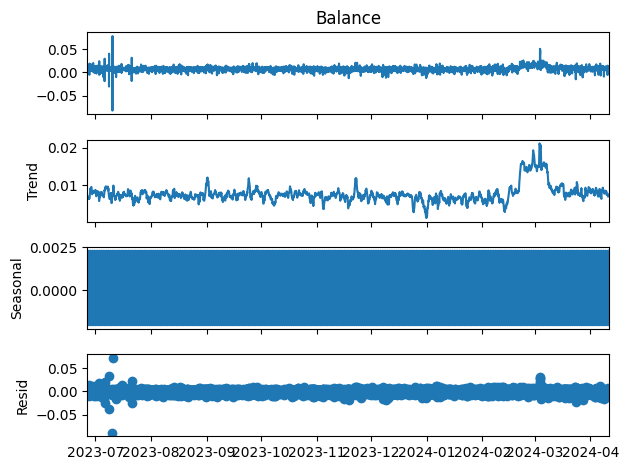


Selección del modelo ARIMA
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-56829.468, Time=14.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-54900.145, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-56113.867, Time=1.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-57044.930, Time=7.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-54902.145, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-56885.648, Time=3.83 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-56987.442, Time=1.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-56903.734, Time=6.69 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-57047.647, Time=2.76 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-56887.649, Time=3.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-57532.078, Time=4.88 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-57160.798, Time=4.35 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-57225.335, Time=1.12 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=-5

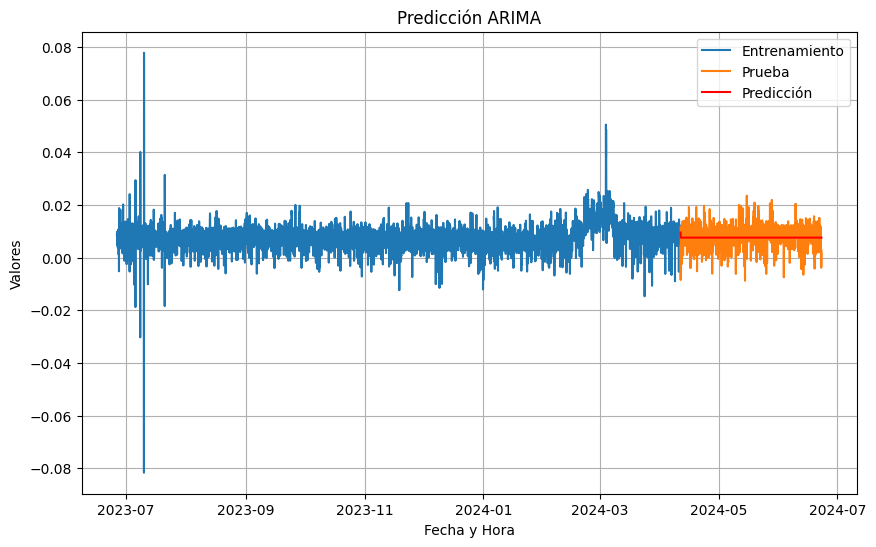

RMSE: 0.004095138642971339

Validación del modelo


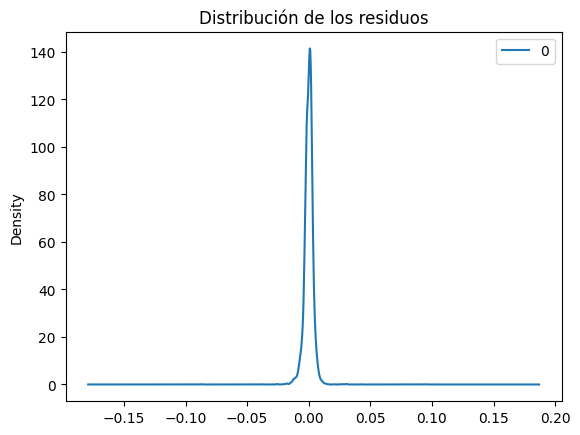

                  0
count  6.956000e+03
mean   4.234004e-07
std    3.867519e-03
min   -8.751056e-02
25%   -1.852130e-03
50%    2.351425e-04
75%    1.960396e-03
max    9.545235e-02


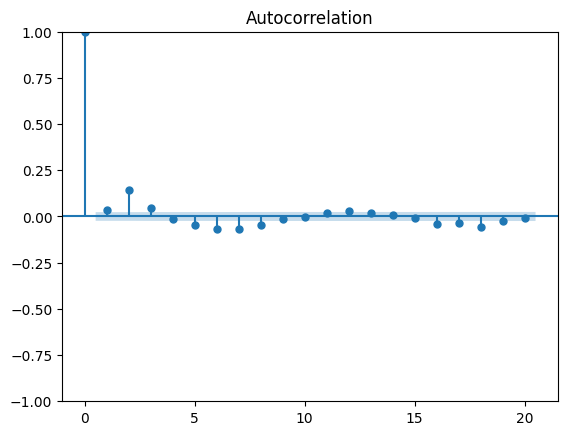

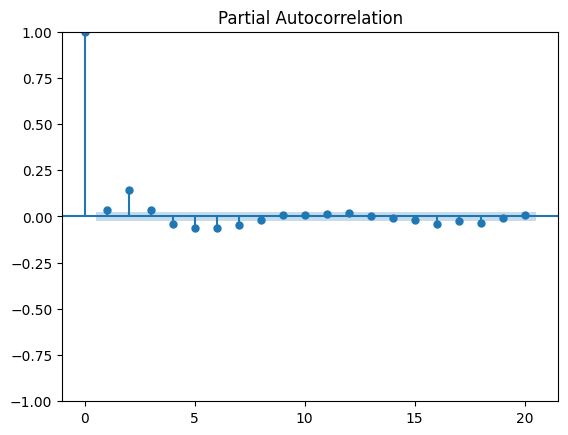


Predicción futura


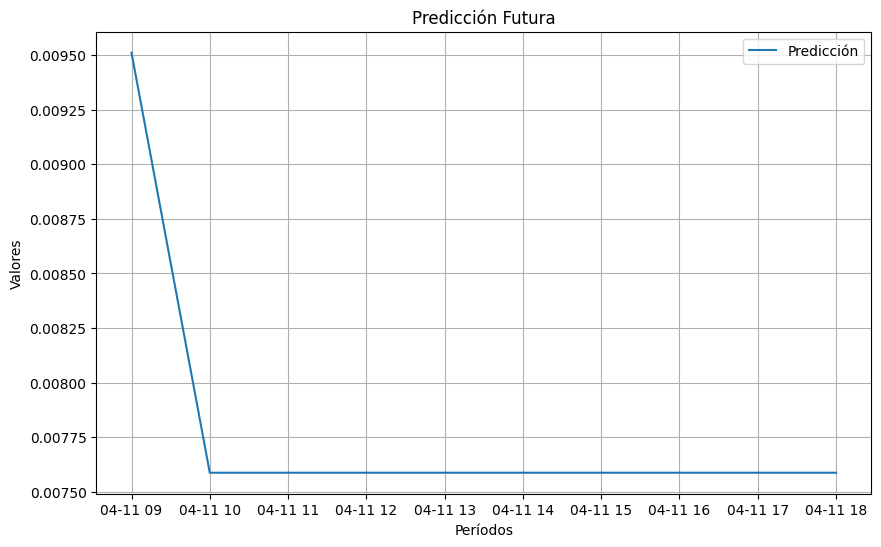

In [12]:
for column in datosmodelo.columns:
    print(f"\n--- Procesando {column} ---")
    series = datosmodelo[column]

    # Dividir la serie en conjuntos de entrenamiento y prueba
    train, test = train_test_split(series)

    # 1. Visualización
    plot_series(series, f'Serie Temporal Completa - {column}')
    plot_series(train, f'Serie Temporal de Entrenamiento - {column}')
    plot_series(test, f'Serie Temporal de Prueba - {column}')

    # 2. Prueba de Dickey-Fuller Aumentada (ADF)
    print("\nPrueba de Dickey-Fuller:")
    adf_test(train)

    # 3. Descomposición de la serie temporal
    print("\nDescomposición de la serie temporal:")
    decompose_series(train, period=24)

    # 4. Transformación de la serie si no es estacionaria
    if adfuller(train)[1] >= 0.05:
        print("\nDiferenciación de la serie para hacerla estacionaria")
        train = difference_series(train)
        test = difference_series(test)
        plot_series(train, f'Serie Temporal Diferenciada de Entrenamiento - {column}')
        adf_test(train)

    # 5. Selección del modelo ARIMA
    print("\nSelección del modelo ARIMA")
    arima_model = select_arima_model(train)

    # 6. Evaluación del modelo
    print("\nEvaluación del modelo")
    model_fit = evaluate_model(train, test, arima_model)

    # 7. Validación del modelo
    print("\nValidación del modelo")
    validate_model_residuals(model_fit)

    # 8. Predicción futura
    print("\nPredicción futura")
    forecast = predict_future(model_fit, periods=10)

Modelo con redes neuronales:

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [17]:
target_column = 'Consumo_kWhs'
data = datos[[target_column]].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [20]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i + seq_length]
        target = data[i + seq_length]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)


sequence_length = 3

X, y = create_sequences(scaled_data, sequence_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Crear el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
435/435 [==============================] - 10s 12ms/step - loss: 0.0093 - val_loss: 0.0051
Epoch 2/10
435/435 [==============================] - 3s 7ms/step - loss: 0.0081 - val_loss: 0.0049
Epoch 3/10
435/435 [==============================] - 3s 7ms/step - loss: 0.0080 - val_loss: 0.0057
Epoch 4/10
435/435 [==============================] - 4s 9ms/step - loss: 0.0080 - val_loss: 0.0054
Epoch 5/10
435/435 [==============================] - 4s 9ms/step - loss: 0.0080 - val_loss: 0.0049
Epoch 6/10
435/435 [==============================] - 3s 7ms/step - loss: 0.0079 - val_loss: 0.0048
Epoch 7/10
435/435 [==============================] - 3s 7ms/step - loss: 0.0079 - val_loss: 0.0048
Epoch 8/10
435/435 [==============================] - 3s 8ms/step - loss: 0.0079 - val_loss: 0.0048
Epoch 9/10
435/435 [==============================] - 4s 9ms/step - loss: 0.0079 - val_loss: 0.0051
Epoch 10/10
435/435 [==============================] - 3s 7ms/step - loss: 0.0079 - val_loss: 0.00

In [23]:
# Evaluar el modelo
loss = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')

55/55 [==============================] - 0s 3ms/step - loss: 0.0049
Loss: 0.004866152070462704


Predicciones:

55/55 [==============================] - 3s 8ms/step


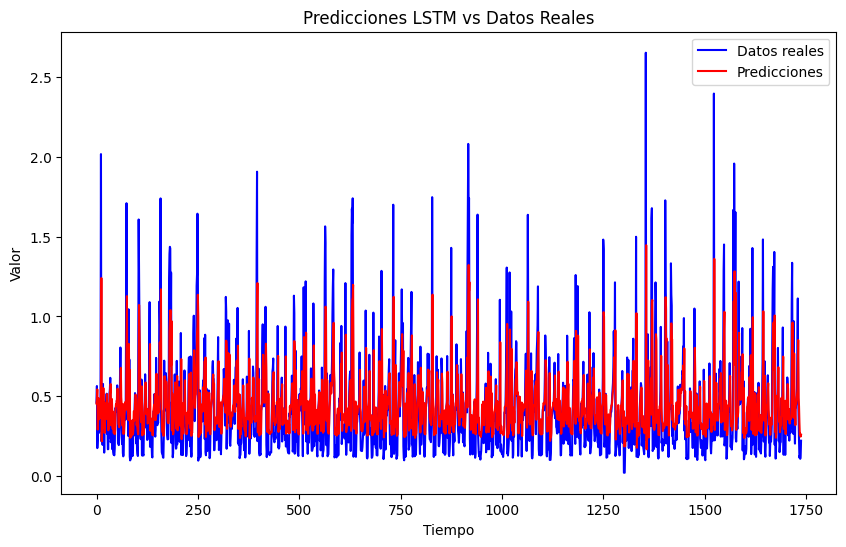

In [24]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Desnormalizar los datos de prueba
y_test_actual = scaler.inverse_transform(y_test)

# Visualizar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Datos reales')
plt.plot(predictions, color='red', label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones LSTM vs Datos Reales')
plt.legend()
plt.show()